In [1]:
# coding 
import math
from math import sqrt
import numpy as np
import seaborn as sns
import scipy.stats as stats
import pandas as pd
import matplotlib.pyplot as plt
from pydataset import data
import scipy.stats
import scipy
import os

# needed for modeling
import sklearn.preprocessing
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler, QuantileTransformer
from sklearn.metrics import explained_variance_score
import statsmodels.api as sm
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression, LassoLars, TweedieRegressor
from sklearn.preprocessing import PolynomialFeatures
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (16,9)
plt.rcParams["font.size"] = 20
from statsmodels.tsa.api import Holt


In [2]:
# downloading csv
state_min = pd.read_csv("Minimum Wage Data.csv",encoding='cp1252')

In [3]:
# downloading csv
fed_min = pd.read_csv("MinimumWage.csv",encoding='cp1252')

In [4]:
# downloading csv
political_party = pd.read_csv("MinWage_PartyControl.csv",encoding='cp1252')

In [5]:
# downloading csv
gas_prices = pd.read_csv("PET_PRI_GND_DCUS_NUS_W.csv",encoding='cp1252')

In [6]:
# visualizing the csv
state_min

,Year,State,State.Minimum.Wage,State.Minimum.Wage.2020.Dollars,Federal.Minimum.Wage,Federal.Minimum.Wage.2020.Dollars,Effective.Minimum.Wage,Effective.Minimum.Wage.2020.Dollars,CPI.Average,Department.Of.Labor.Uncleaned.Data,Department.Of.Labor.Cleaned.Low.Value,Department.Of.Labor.Cleaned.Low.Value.2020.Dollars,Department.Of.Labor.Cleaned.High.Value,Department.Of.Labor.Cleaned.High.Value.2020.Dollars,Footnote
0,1968,Alabama,0.00000,0.00,1.15,8.55,1.15,8.55,34.80,...,0.00000,0.00,0.00000,0.00,NaN
1,1968,Alaska,2.10000,15.61,1.15,8.55,2.10,15.61,34.80,2.1,2.10000,15.61,2.10000,15.61,NaN
2,1968,Arizona,0.46800,3.48,1.15,8.55,1.15,8.55,34.80,18.72 - 26.40/wk(b),0.46800,3.48,0.66000,4.91,(b)
3,1968,Arkansas,0.15625,1.16,1.15,8.55,1.15,8.55,34.80,1.25/day(b),0.15625,1.16,0.15625,1.16,(b)
4,1968,California,1.65000,12.26,1.15,8.55,1.65,12.26,34.80,1.65(b),1.65000,12.26,1.65000,12.26,(b)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2857,2020,Virginia,7.25000,7.25,7.25,7.25,7.25,7.25,258.66,7.25[c],7.25000,7.25,7.25000,7.25,[c]
2858,2020,Washington,13.50000,13.50,7.25,7.25,13.50,13.50,258.66,13.5,13.50000,13.50,13.50000,13.50,NaN
2859,2020,West Virginia,8.75000,8.75,7.25,7.25,8.75,8.75,258.66,8.75,8.75000,8.75,8.75000,8.75,NaN
2860,2020,Wisconsin,7.25000,7.25,7.25,7.25,7.25,7.25,258.66,7.25,7.25000,7.25,7.25000,7.25,NaN


In [7]:
# visualizing the csv
fed_min

,Year,FederalMinimumWage,MeanAnnualInflation,MinWageIndexedLastRaiseYear,UnemploymentRateDecember,GDP_AnnualGrowth
0,1930,$0.00,-2.30%,NaN,8.70%,-8.50%
1,1931,$0.00,-9.00%,NaN,15.90%,-6.40%
2,1932,$0.00,-9.90%,NaN,23.60%,-12.90%
3,1933,$0.00,-5.10%,NaN,24.90%,-1.20%
4,1934,$0.00,3.10%,NaN,21.70%,10.80%
5,1935,$0.00,2.20%,NaN,20.10%,8.90%
6,1936,$0.00,1.50%,NaN,16.90%,12.90%
7,1937,$0.00,3.60%,NaN,14.30%,5.10%
8,1938,$0.25,-2.10%,$0.25,19.00%,-3.30%
9,1939,$0.30,-1.40%,$0.30,17.20%,8.00%


In [8]:
# visualizing the csv
political_party

,Year,PresParty,SenParty,HouseParty,TrifectaFlag,FedMinWage,RateChange,PercentChange,IncreaseFlag,YearsSinceLastChange
0,1938,Democrat,Democrat,Democrat,Democrat,$0.25,$0.25,100.00,True,0
1,1939,Democrat,Democrat,Democrat,Democrat,$0.30,$0.05,16.67,True,1
2,1940,Democrat,Democrat,Democrat,Democrat,$0.30,$0.00,0.00,False,1
3,1941,Democrat,Democrat,Democrat,Democrat,$0.30,$0.00,0.00,False,2
4,1942,Democrat,Democrat,Democrat,Democrat,$0.30,$0.00,0.00,False,3
5,1943,Democrat,Democrat,Democrat,Democrat,$0.30,$0.00,0.00,False,4
6,1944,Democrat,Democrat,Democrat,Democrat,$0.30,$0.00,0.00,False,5
7,1945,Democrat,Democrat,Democrat,Democrat,$0.40,$0.10,25.00,True,6
8,1946,Democrat,Democrat,Democrat,Democrat,$0.40,$0.00,0.00,False,1
9,1947,Democrat,Republican,Republican,None,$0.40,$0.00,0.00,False,2


In [9]:
# visualizing the csv
gas_prices

,Date,A1,A2,A3,R1,R2,R3,M1,M2,M3,P1,P2,P3,D1
0,01/02/1995,1.127,1.104,1.231,1.079,1.063,1.167,1.170,1.159,1.298,1.272,1.250,1.386,1.104
1,01/09/1995,1.134,1.111,1.232,1.086,1.070,1.169,1.177,1.164,1.300,1.279,1.256,1.387,1.102
2,01/16/1995,1.126,1.102,1.231,1.078,1.062,1.169,1.168,1.155,1.299,1.271,1.249,1.385,1.100
3,01/23/1995,1.132,1.110,1.226,1.083,1.068,1.165,1.177,1.165,1.296,1.277,1.256,1.378,1.095
4,01/30/1995,1.131,1.109,1.221,1.083,1.068,1.162,1.176,1.163,1.291,1.275,1.255,1.370,1.090
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1356,12/28/2020,2.330,2.225,2.535,2.243,2.158,2.423,2.634,2.482,2.858,2.889,2.770,3.031,2.635
1357,01/04/2021,2.336,2.227,2.549,2.249,2.160,2.437,2.639,2.484,2.867,2.895,2.771,3.042,2.640
1358,01/11/2021,2.403,2.298,2.610,2.317,2.232,2.498,2.702,2.550,2.927,2.959,2.839,3.101,2.670
1359,01/18/2021,2.464,2.351,2.688,2.379,2.285,2.579,2.759,2.601,2.995,3.014,2.885,3.166,2.696


In [10]:
#joining state min wage with fed
fed_state_join = state_min.merge(fed_min, how='inner')

In [11]:
fed_state_join

,Year,State,State.Minimum.Wage,State.Minimum.Wage.2020.Dollars,Federal.Minimum.Wage,Federal.Minimum.Wage.2020.Dollars,Effective.Minimum.Wage,Effective.Minimum.Wage.2020.Dollars,CPI.Average,Department.Of.Labor.Uncleaned.Data,Department.Of.Labor.Cleaned.Low.Value,Department.Of.Labor.Cleaned.Low.Value.2020.Dollars,Department.Of.Labor.Cleaned.High.Value,Department.Of.Labor.Cleaned.High.Value.2020.Dollars,Footnote,FederalMinimumWage,MeanAnnualInflation,MinWageIndexedLastRaiseYear,UnemploymentRateDecember,GDP_AnnualGrowth
0,1968,Alabama,0.00000,0.00,1.15,8.55,1.15,8.55,34.80,...,0.00000,0.00,0.00000,0.00,NaN,$1.60,4.20%,$1.60,3.40%,4.90%
1,1968,Alaska,2.10000,15.61,1.15,8.55,2.10,15.61,34.80,2.1,2.10000,15.61,2.10000,15.61,NaN,$1.60,4.20%,$1.60,3.40%,4.90%
2,1968,Arizona,0.46800,3.48,1.15,8.55,1.15,8.55,34.80,18.72 - 26.40/wk(b),0.46800,3.48,0.66000,4.91,(b),$1.60,4.20%,$1.60,3.40%,4.90%
3,1968,Arkansas,0.15625,1.16,1.15,8.55,1.15,8.55,34.80,1.25/day(b),0.15625,1.16,0.15625,1.16,(b),$1.60,4.20%,$1.60,3.40%,4.90%
4,1968,California,1.65000,12.26,1.15,8.55,1.65,12.26,34.80,1.65(b),1.65000,12.26,1.65000,12.26,(b),$1.60,4.20%,$1.60,3.40%,4.90%
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2857,2020,Virginia,7.25000,7.25,7.25,7.25,7.25,7.25,258.66,7.25[c],7.25000,7.25,7.25000,7.25,[c],$7.25,1.20%,$5.99,6.70%,-3.40%
2858,2020,Washington,13.50000,13.50,7.25,7.25,13.50,13.50,258.66,13.5,13.50000,13.50,13.50000,13.50,NaN,$7.25,1.20%,$5.99,6.70%,-3.40%
2859,2020,West Virginia,8.75000,8.75,7.25,7.25,8.75,8.75,258.66,8.75,8.75000,8.75,8.75000,8.75,NaN,$7.25,1.20%,$5.99,6.70%,-3.40%
2860,2020,Wisconsin,7.25000,7.25,7.25,7.25,7.25,7.25,258.66,7.25,7.25000,7.25,7.25000,7.25,NaN,$7.25,1.20%,$5.99,6.70%,-3.40%


In [12]:
#joining min wage with political party
all_plus_pol = fed_state_join.merge(political_party, how='inner')

In [13]:
all_plus_pol

,Year,State,State.Minimum.Wage,State.Minimum.Wage.2020.Dollars,Federal.Minimum.Wage,Federal.Minimum.Wage.2020.Dollars,Effective.Minimum.Wage,Effective.Minimum.Wage.2020.Dollars,CPI.Average,Department.Of.Labor.Uncleaned.Data,...,GDP_AnnualGrowth,PresParty,SenParty,HouseParty,TrifectaFlag,FedMinWage,RateChange,PercentChange,IncreaseFlag,YearsSinceLastChange
0,1968,Alabama,0.00000,0.00,1.15,8.55,1.15,8.55,34.80,...,...,4.90%,Democrat,Democrat,Democrat,Democrat,$1.60,$0.20,12.5,True,1
1,1968,Alaska,2.10000,15.61,1.15,8.55,2.10,15.61,34.80,2.1,...,4.90%,Democrat,Democrat,Democrat,Democrat,$1.60,$0.20,12.5,True,1
2,1968,Arizona,0.46800,3.48,1.15,8.55,1.15,8.55,34.80,18.72 - 26.40/wk(b),...,4.90%,Democrat,Democrat,Democrat,Democrat,$1.60,$0.20,12.5,True,1
3,1968,Arkansas,0.15625,1.16,1.15,8.55,1.15,8.55,34.80,1.25/day(b),...,4.90%,Democrat,Democrat,Democrat,Democrat,$1.60,$0.20,12.5,True,1
4,1968,California,1.65000,12.26,1.15,8.55,1.65,12.26,34.80,1.65(b),...,4.90%,Democrat,Democrat,Democrat,Democrat,$1.60,$0.20,12.5,True,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2857,2020,Virginia,7.25000,7.25,7.25,7.25,7.25,7.25,258.66,7.25[c],...,-3.40%,Republican,Republican,Democrat,None,$7.25,$0.00,0.0,False,11
2858,2020,Washington,13.50000,13.50,7.25,7.25,13.50,13.50,258.66,13.5,...,-3.40%,Republican,Republican,Democrat,None,$7.25,$0.00,0.0,False,11
2859,2020,West Virginia,8.75000,8.75,7.25,7.25,8.75,8.75,258.66,8.75,...,-3.40%,Republican,Republican,Democrat,None,$7.25,$0.00,0.0,False,11
2860,2020,Wisconsin,7.25000,7.25,7.25,7.25,7.25,7.25,258.66,7.25,...,-3.40%,Republican,Republican,Democrat,None,$7.25,$0.00,0.0,False,11


In [14]:
#visuallizing the date to join with the rest of the data
gas_prices.Date
#have to change the date style

0       01/02/1995
1       01/09/1995
2       01/16/1995
3       01/23/1995
4       01/30/1995
           ...    
1356    12/28/2020
1357    01/04/2021
1358    01/11/2021
1359    01/18/2021
1360    01/25/2021
Name: Date, Length: 1361, dtype: object

In [15]:
gas_prices['Date'] = pd.to_datetime(gas_prices['Date'],format='%m/%d/%Y')
gas_prices

,Date,A1,A2,A3,R1,R2,R3,M1,M2,M3,P1,P2,P3,D1
0,1995-01-02,1.127,1.104,1.231,1.079,1.063,1.167,1.170,1.159,1.298,1.272,1.250,1.386,1.104
1,1995-01-09,1.134,1.111,1.232,1.086,1.070,1.169,1.177,1.164,1.300,1.279,1.256,1.387,1.102
2,1995-01-16,1.126,1.102,1.231,1.078,1.062,1.169,1.168,1.155,1.299,1.271,1.249,1.385,1.100
3,1995-01-23,1.132,1.110,1.226,1.083,1.068,1.165,1.177,1.165,1.296,1.277,1.256,1.378,1.095
4,1995-01-30,1.131,1.109,1.221,1.083,1.068,1.162,1.176,1.163,1.291,1.275,1.255,1.370,1.090
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1356,2020-12-28,2.330,2.225,2.535,2.243,2.158,2.423,2.634,2.482,2.858,2.889,2.770,3.031,2.635
1357,2021-01-04,2.336,2.227,2.549,2.249,2.160,2.437,2.639,2.484,2.867,2.895,2.771,3.042,2.640
1358,2021-01-11,2.403,2.298,2.610,2.317,2.232,2.498,2.702,2.550,2.927,2.959,2.839,3.101,2.670
1359,2021-01-18,2.464,2.351,2.688,2.379,2.285,2.579,2.759,2.601,2.995,3.014,2.885,3.166,2.696


In [16]:
#making a date column with only year
gas_prices['Year'] = gas_prices.Date.dt.year
gas_prices = pd.DataFrame(gas_prices)

In [17]:
# merging gasprices & all_plus_political.
update = all_plus_pol.merge(gas_prices, how='inner')

In [18]:
update

,Year,State,State.Minimum.Wage,State.Minimum.Wage.2020.Dollars,Federal.Minimum.Wage,Federal.Minimum.Wage.2020.Dollars,Effective.Minimum.Wage,Effective.Minimum.Wage.2020.Dollars,CPI.Average,Department.Of.Labor.Uncleaned.Data,...,R1,R2,R3,M1,M2,M3,P1,P2,P3,D1
0,1995,Alabama,0.00,0.00,4.25,7.21,4.25,7.21,152.40,...,...,1.079,1.063,1.167,1.170,1.159,1.298,1.272,1.250,1.386,1.104
1,1995,Alabama,0.00,0.00,4.25,7.21,4.25,7.21,152.40,...,...,1.086,1.070,1.169,1.177,1.164,1.300,1.279,1.256,1.387,1.102
2,1995,Alabama,0.00,0.00,4.25,7.21,4.25,7.21,152.40,...,...,1.078,1.062,1.169,1.168,1.155,1.299,1.271,1.249,1.385,1.100
3,1995,Alabama,0.00,0.00,4.25,7.21,4.25,7.21,152.40,...,...,1.083,1.068,1.165,1.177,1.165,1.296,1.277,1.256,1.378,1.095
4,1995,Alabama,0.00,0.00,4.25,7.21,4.25,7.21,152.40,...,...,1.083,1.068,1.162,1.176,1.163,1.291,1.275,1.255,1.370,1.090
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
73273,2020,Wyoming,5.15,5.15,7.25,7.25,7.25,7.25,258.66,5.15,...,2.120,2.022,2.329,2.540,2.379,2.778,2.792,2.661,2.947,2.502
73274,2020,Wyoming,5.15,5.15,7.25,7.25,7.25,7.25,258.66,5.15,...,2.156,2.063,2.355,2.567,2.412,2.798,2.820,2.694,2.968,2.526
73275,2020,Wyoming,5.15,5.15,7.25,7.25,7.25,7.25,258.66,5.15,...,2.158,2.063,2.361,2.565,2.407,2.800,2.821,2.693,2.973,2.559
73276,2020,Wyoming,5.15,5.15,7.25,7.25,7.25,7.25,258.66,5.15,...,2.224,2.137,2.410,2.618,2.466,2.843,2.871,2.749,3.015,2.619


In [19]:
#making all combined updated data into a DataFrame
df = pd.DataFrame(update)

In [20]:
df

,Year,State,State.Minimum.Wage,State.Minimum.Wage.2020.Dollars,Federal.Minimum.Wage,Federal.Minimum.Wage.2020.Dollars,Effective.Minimum.Wage,Effective.Minimum.Wage.2020.Dollars,CPI.Average,Department.Of.Labor.Uncleaned.Data,...,R1,R2,R3,M1,M2,M3,P1,P2,P3,D1
0,1995,Alabama,0.00,0.00,4.25,7.21,4.25,7.21,152.40,...,...,1.079,1.063,1.167,1.170,1.159,1.298,1.272,1.250,1.386,1.104
1,1995,Alabama,0.00,0.00,4.25,7.21,4.25,7.21,152.40,...,...,1.086,1.070,1.169,1.177,1.164,1.300,1.279,1.256,1.387,1.102
2,1995,Alabama,0.00,0.00,4.25,7.21,4.25,7.21,152.40,...,...,1.078,1.062,1.169,1.168,1.155,1.299,1.271,1.249,1.385,1.100
3,1995,Alabama,0.00,0.00,4.25,7.21,4.25,7.21,152.40,...,...,1.083,1.068,1.165,1.177,1.165,1.296,1.277,1.256,1.378,1.095
4,1995,Alabama,0.00,0.00,4.25,7.21,4.25,7.21,152.40,...,...,1.083,1.068,1.162,1.176,1.163,1.291,1.275,1.255,1.370,1.090
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
73273,2020,Wyoming,5.15,5.15,7.25,7.25,7.25,7.25,258.66,5.15,...,2.120,2.022,2.329,2.540,2.379,2.778,2.792,2.661,2.947,2.502
73274,2020,Wyoming,5.15,5.15,7.25,7.25,7.25,7.25,258.66,5.15,...,2.156,2.063,2.355,2.567,2.412,2.798,2.820,2.694,2.968,2.526
73275,2020,Wyoming,5.15,5.15,7.25,7.25,7.25,7.25,258.66,5.15,...,2.158,2.063,2.361,2.565,2.407,2.800,2.821,2.693,2.973,2.559
73276,2020,Wyoming,5.15,5.15,7.25,7.25,7.25,7.25,258.66,5.15,...,2.224,2.137,2.410,2.618,2.466,2.843,2.871,2.749,3.015,2.619


In [21]:
# renaming collunns
df['state_wage'] = df['State.Minimum.Wage']
df['fed_wage'] = df['Federal.Minimum.Wage']
df

,Year,State,State.Minimum.Wage,State.Minimum.Wage.2020.Dollars,Federal.Minimum.Wage,Federal.Minimum.Wage.2020.Dollars,Effective.Minimum.Wage,Effective.Minimum.Wage.2020.Dollars,CPI.Average,Department.Of.Labor.Uncleaned.Data,...,R3,M1,M2,M3,P1,P2,P3,D1,state_wage,fed_wage
0,1995,Alabama,0.00,0.00,4.25,7.21,4.25,7.21,152.40,...,...,1.167,1.170,1.159,1.298,1.272,1.250,1.386,1.104,0.00,4.25
1,1995,Alabama,0.00,0.00,4.25,7.21,4.25,7.21,152.40,...,...,1.169,1.177,1.164,1.300,1.279,1.256,1.387,1.102,0.00,4.25
2,1995,Alabama,0.00,0.00,4.25,7.21,4.25,7.21,152.40,...,...,1.169,1.168,1.155,1.299,1.271,1.249,1.385,1.100,0.00,4.25
3,1995,Alabama,0.00,0.00,4.25,7.21,4.25,7.21,152.40,...,...,1.165,1.177,1.165,1.296,1.277,1.256,1.378,1.095,0.00,4.25
4,1995,Alabama,0.00,0.00,4.25,7.21,4.25,7.21,152.40,...,...,1.162,1.176,1.163,1.291,1.275,1.255,1.370,1.090,0.00,4.25
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
73273,2020,Wyoming,5.15,5.15,7.25,7.25,7.25,7.25,258.66,5.15,...,2.329,2.540,2.379,2.778,2.792,2.661,2.947,2.502,5.15,7.25
73274,2020,Wyoming,5.15,5.15,7.25,7.25,7.25,7.25,258.66,5.15,...,2.355,2.567,2.412,2.798,2.820,2.694,2.968,2.526,5.15,7.25
73275,2020,Wyoming,5.15,5.15,7.25,7.25,7.25,7.25,258.66,5.15,...,2.361,2.565,2.407,2.800,2.821,2.693,2.973,2.559,5.15,7.25
73276,2020,Wyoming,5.15,5.15,7.25,7.25,7.25,7.25,258.66,5.15,...,2.410,2.618,2.466,2.843,2.871,2.749,3.015,2.619,5.15,7.25


- A1: Weekly U.S. All Grades All Formulations Retail Gasoline Prices (Dollars per Gallon)
- A2: Weekly U.S. All Grades Conventional Retail Gasoline Prices (Dollars per Gallon)
- A3: Weekly U.S. All Grades Reformulated Retail Gasoline Prices (Dollars per Gallon)
- R1: Weekly U.S. Regular All Formulations Retail Gasoline Prices (Dollars per Gallon)
- R2: Weekly U.S. Regular Conventional Retail Gasoline Prices (Dollars per Gallon)
- R3: Weekly U.S. Regular Reformulated Retail Gasoline Prices (Dollars per Gallon)
- M1: Weekly U.S. Midgrade All Formulations Retail Gasoline Prices (Dollars per Gallon)
- M2: Weekly U.S. Midgrade Conventional Retail Gasoline Prices (Dollars per Gallon)
- M3: Weekly U.S. Midgrade Reformulated Retail Gasoline Prices (Dollars per Gallon)
- P1: Weekly U.S. Premium All Formulations Retail Gasoline Prices (Dollars per Gallon)
- P2: Weekly U.S. Premium Conventional Retail Gasoline Prices (Dollars per Gallon)
- P3: Weekly U.S. Premium Reformulated Retail Gasoline Prices (Dollars per Gallon)
- D1: Weekly U.S. No 2 Diesel Retail Prices (Dollars per Gallon)

- Description of Data
The values in the dataset are as follows:

Year: The year of the data. All minimum wage values are as of January 1 except 1968 and 1969, which are as of February 1.
- State: The state or territory of the data.
- State.Minimum.Wage: The actual State's minimum wage on January 1 of Year.
- State.Minimum.Wage.2020.Dollars: The State.Minimum.Wage in 2020 dollars.
- Federal.Minimum.Wage: The federal minimum wage on January 1 of Year.
- Federal.Minimum.Wage.2020.Dollars: The Federal.Minimum.Wage in 2020 dollars.
- Effective.Minimum.Wage: The minimum wage that is enforced in State on January 1 of Year. Because the federal minimum wage takes effect if the State's minimum wage is lower than the federal minimum wage, this is the higher of the two.
- Effective.Minimum.Wage.2020.Dollars: The Effective.Minimum.Wage in 2020 dollars.
- CPI.Average: The average value of the Consumer Price Index in Year. When I pulled the data from the Bureau of Labor Statistics, I selected the dataset with "all items in U.S. city average, all urban consumers, not seasonally adjusted".
- Department.Of.Labor.Uncleaned.Data: The unclean, scraped value from the Department of Labor's website.
- Department.Of.Labor.Cleaned.Low.Value: The State's lowest enforced minimum wage on January 1 of Year. If there is only one minimum wage, this and the value for Department.Of.Labor.Cleaned.High.Value are identical. (Some states enforce different minimum wage laws depending on the size of the business. In states where this is the case, generally, smaller businesses have slightly lower minimum wage requirements.)
- Department.Of.Labor.Cleaned.Low.Value.2020.Dollars: The Department.Of.Labor.Cleaned.Low.Value in 2020 dollars.
- Department.Of.Labor.Cleaned.High.Value: The State's higher enforced minimum wage on January 1 of Year. If there is only one minimum wage, this and the value for Department.Of.Labor.Cleaned.Low.Value are identical.
- Department.Of.Labor.Cleaned.High.Value.2020.Dollars: The Department.Of.Labor.Cleaned.High.Value in 2020 dollars.
- Footnote: The footnote provided on the Department of Labor's website. See more below.



### For state data - " columns to drop because we dont need this information, we only need the state minimums"

- State.Minimum.Wage.2020.Dollars: The State.Minimum.Wage in 2020 dollars.
- Federal.Minimum.Wage.2020.Dollars: The Federal.Minimum.Wage in 2020 dollars.
- Effective.Minimum.Wage.2020.Dollars: The Effective.Minimum.Wage in 2020 dollars.

- CPI.Average: The average value of the Consumer Price Index in Year. When I pulled the data from the Bureau of Labor Statistics, I selected the dataset with "all items in U.S. city average, all urban consumers, not seasonally adjusted".

- Department.Of.Labor.Uncleaned.Data: The unclean, scraped value from the Department of Labor's website.
- Department.Of.Labor.Cleaned.Low.Value: The State's lowest enforced minimum wage on January 1 of Year. If there is only one minimum wage, this and the value for Department.Of.Labor.Cleaned.High.Value are identical. (Some states enforce different minimum wage laws depending on the size of the business. In states where this is the case, generally, smaller businesses have slightly lower minimum wage requirements.)
- Department.Of.Labor.Cleaned.Low.Value.2020.Dollars: The Department.Of.Labor.Cleaned.Low.Value in 2020 dollars.
- Department.Of.Labor.Cleaned.High.Value: The State's higher enforced minimum wage on January 1 of Year. If there is only one minimum wage, this and the value for Department.Of.Labor.Cleaned.Low.Value are identical.
- Department.Of.Labor.Cleaned.High.Value.2020.Dollars: The Department.Of.Labor.Cleaned.High.Value in 2020 dollars.
- Footnote: The footnote provided on the Department of Labor's website. See more below.

In [22]:
df.columns

Index(['Year', 'State', 'State.Minimum.Wage',
       'State.Minimum.Wage.2020.Dollars', 'Federal.Minimum.Wage',
       'Federal.Minimum.Wage.2020.Dollars', 'Effective.Minimum.Wage',
       'Effective.Minimum.Wage.2020.Dollars', 'CPI.Average',
       'Department.Of.Labor.Uncleaned.Data',
       'Department.Of.Labor.Cleaned.Low.Value',
       'Department.Of.Labor.Cleaned.Low.Value.2020.Dollars',
       'Department.Of.Labor.Cleaned.High.Value',
       'Department.Of.Labor.Cleaned.High.Value.2020.Dollars', 'Footnote',
       'FederalMinimumWage', 'MeanAnnualInflation',
       'MinWageIndexedLastRaiseYear', 'UnemploymentRateDecember',
       'GDP_AnnualGrowth', 'PresParty', 'SenParty', 'HouseParty',
       'TrifectaFlag', 'FedMinWage', 'RateChange', 'PercentChange',
       'IncreaseFlag', 'YearsSinceLastChange', 'Date', 'A1', 'A2', 'A3', 'R1',
       'R2', 'R3', 'M1', 'M2', 'M3', 'P1', 'P2', 'P3', 'D1', 'state_wage',
       'fed_wage'],
      dtype='object')

In [23]:
# fed info to drop
df = df.drop(columns=['Effective.Minimum.Wage','Federal.Minimum.Wage','FedMinWage','RateChange','IncreaseFlag','PercentChange','TrifectaFlag'])
#dropping gas collumns that are not needed.
df = df.drop(columns=['A2','A3','R2','R3','M2','M3','P2','P3','R1','M1','P1'])
#state info to drop
df = df.drop(columns=['Year',
                        'State.Minimum.Wage.2020.Dollars',
                          'Federal.Minimum.Wage.2020.Dollars',
                          'Effective.Minimum.Wage.2020.Dollars',
                         'CPI.Average',
                          'Department.Of.Labor.Uncleaned.Data',
                          'Department.Of.Labor.Cleaned.Low.Value',
                         'Department.Of.Labor.Cleaned.Low.Value.2020.Dollars',
                          'Department.Of.Labor.Cleaned.High.Value',
                         'Department.Of.Labor.Cleaned.High.Value.2020.Dollars',
                         'Footnote','MinWageIndexedLastRaiseYear','State.Minimum.Wage','FederalMinimumWage'])
#renaming columns
df.rename(columns = {'A1':'gasoline', 'D1':'diesel'}, inplace = True)




In [24]:
df

,State,MeanAnnualInflation,UnemploymentRateDecember,GDP_AnnualGrowth,PresParty,SenParty,HouseParty,YearsSinceLastChange,Date,gasoline,diesel,state_wage,fed_wage
0,Alabama,2.80%,5.60%,2.70%,Democrat,Republican,Republican,4,1995-01-02,1.127,1.104,0.00,4.25
1,Alabama,2.80%,5.60%,2.70%,Democrat,Republican,Republican,4,1995-01-09,1.134,1.102,0.00,4.25
2,Alabama,2.80%,5.60%,2.70%,Democrat,Republican,Republican,4,1995-01-16,1.126,1.100,0.00,4.25
3,Alabama,2.80%,5.60%,2.70%,Democrat,Republican,Republican,4,1995-01-23,1.132,1.095,0.00,4.25
4,Alabama,2.80%,5.60%,2.70%,Democrat,Republican,Republican,4,1995-01-30,1.131,1.090,0.00,4.25
...,...,...,...,...,...,...,...,...,...,...,...,...,...
73273,Wyoming,1.20%,6.70%,-3.40%,Republican,Republican,Democrat,11,2020-11-30,2.211,2.502,5.15,7.25
73274,Wyoming,1.20%,6.70%,-3.40%,Republican,Republican,Democrat,11,2020-12-07,2.246,2.526,5.15,7.25
73275,Wyoming,1.20%,6.70%,-3.40%,Republican,Republican,Democrat,11,2020-12-14,2.247,2.559,5.15,7.25
73276,Wyoming,1.20%,6.70%,-3.40%,Republican,Republican,Democrat,11,2020-12-21,2.311,2.619,5.15,7.25


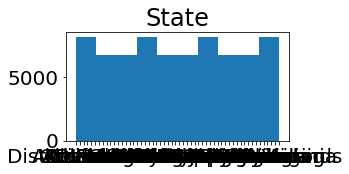

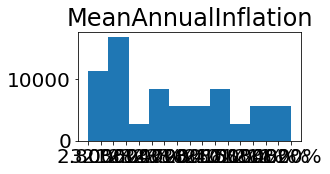

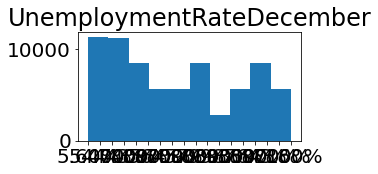

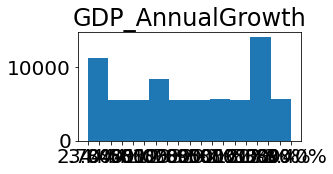

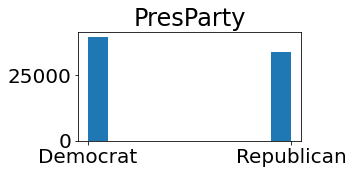

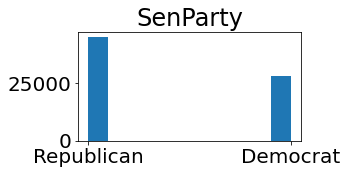

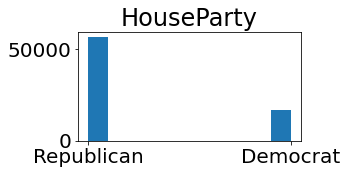

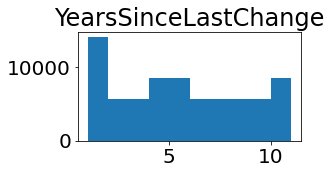

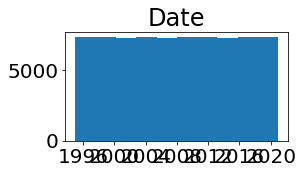

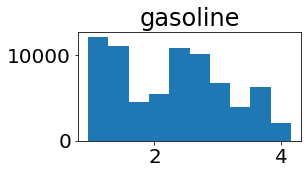

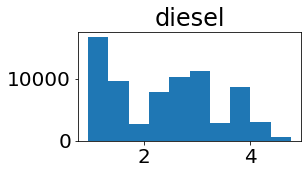

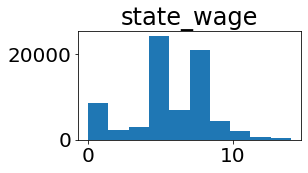

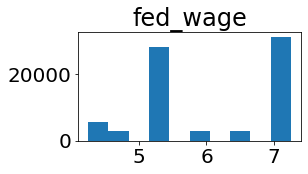

In [25]:
for col in df.columns:
    #graph size
    plt.figure(figsize=(4,2))
    #histogram graph
    plt.hist(df[col])
    #title of column
    plt.title(col)
    # show graph
    plt.show()

In [26]:
df.columns

Index(['State', 'MeanAnnualInflation', 'UnemploymentRateDecember',
       'GDP_AnnualGrowth', 'PresParty', 'SenParty', 'HouseParty',
       'YearsSinceLastChange', 'Date', 'gasoline', 'diesel', 'state_wage',
       'fed_wage'],
      dtype='object')

In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 73278 entries, 0 to 73277
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   State                     73278 non-null  object        
 1   MeanAnnualInflation       73278 non-null  object        
 2   UnemploymentRateDecember  73278 non-null  object        
 3   GDP_AnnualGrowth          73278 non-null  object        
 4   PresParty                 73278 non-null  object        
 5   SenParty                  73278 non-null  object        
 6   HouseParty                73278 non-null  object        
 7   YearsSinceLastChange      73278 non-null  int64         
 8   Date                      73278 non-null  datetime64[ns]
 9   gasoline                  73278 non-null  float64       
 10  diesel                    73278 non-null  float64       
 11  state_wage                73278 non-null  float64       
 12  fed_wage          

### Converting Year to datetime64

In [28]:
# convert our date column to datetime type
df.set_index('Date',inplace=True)
df

,State,MeanAnnualInflation,UnemploymentRateDecember,GDP_AnnualGrowth,PresParty,SenParty,HouseParty,YearsSinceLastChange,gasoline,diesel,state_wage,fed_wage
Date,,,,,,,,,,,,
1995-01-02,Alabama,2.80%,5.60%,2.70%,Democrat,Republican,Republican,4,1.127,1.104,0.00,4.25
1995-01-09,Alabama,2.80%,5.60%,2.70%,Democrat,Republican,Republican,4,1.134,1.102,0.00,4.25
1995-01-16,Alabama,2.80%,5.60%,2.70%,Democrat,Republican,Republican,4,1.126,1.100,0.00,4.25
1995-01-23,Alabama,2.80%,5.60%,2.70%,Democrat,Republican,Republican,4,1.132,1.095,0.00,4.25
1995-01-30,Alabama,2.80%,5.60%,2.70%,Democrat,Republican,Republican,4,1.131,1.090,0.00,4.25
...,...,...,...,...,...,...,...,...,...,...,...,...
2020-11-30,Wyoming,1.20%,6.70%,-3.40%,Republican,Republican,Democrat,11,2.211,2.502,5.15,7.25
2020-12-07,Wyoming,1.20%,6.70%,-3.40%,Republican,Republican,Democrat,11,2.246,2.526,5.15,7.25
2020-12-14,Wyoming,1.20%,6.70%,-3.40%,Republican,Republican,Democrat,11,2.247,2.559,5.15,7.25


In [29]:
df.resample('Y').mean()


,YearsSinceLastChange,gasoline,diesel,state_wage,fed_wage
Date,,,,,
1995-12-31,4.0,1.157712,1.109154,3.542963,4.25
1996-12-31,5.0,1.244528,1.235283,3.599444,4.25
1997-12-31,1.0,1.244250,1.198308,3.847593,4.75
1998-12-31,1.0,1.071712,1.043885,4.155185,5.15
1999-12-31,2.0,1.176058,1.120519,4.155185,5.15
2000-12-31,3.0,1.522731,1.490769,4.251111,5.15
2001-12-31,4.0,1.460302,1.400509,4.327407,5.15
2002-12-31,5.0,1.385962,1.318750,4.500185,5.15
2003-12-31,6.0,1.603019,1.509327,4.559630,5.15


<AxesSubplot:xlabel='Date'>

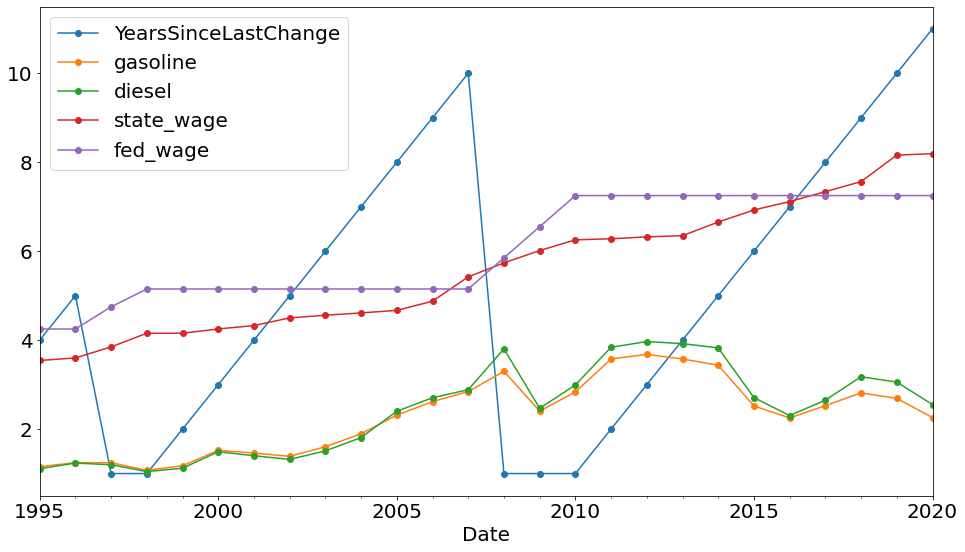

In [30]:
df.resample('Y').mean().plot(marker='o')

<AxesSubplot:xlabel='Date'>

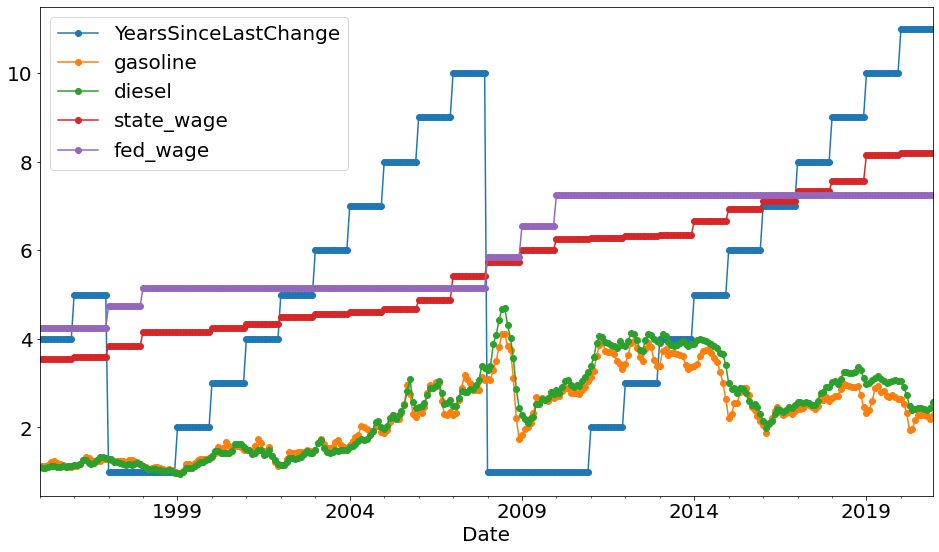

In [31]:
df.resample('M').sum()
df.resample('M').mean().plot(marker='o')

<AxesSubplot:xlabel='Date'>

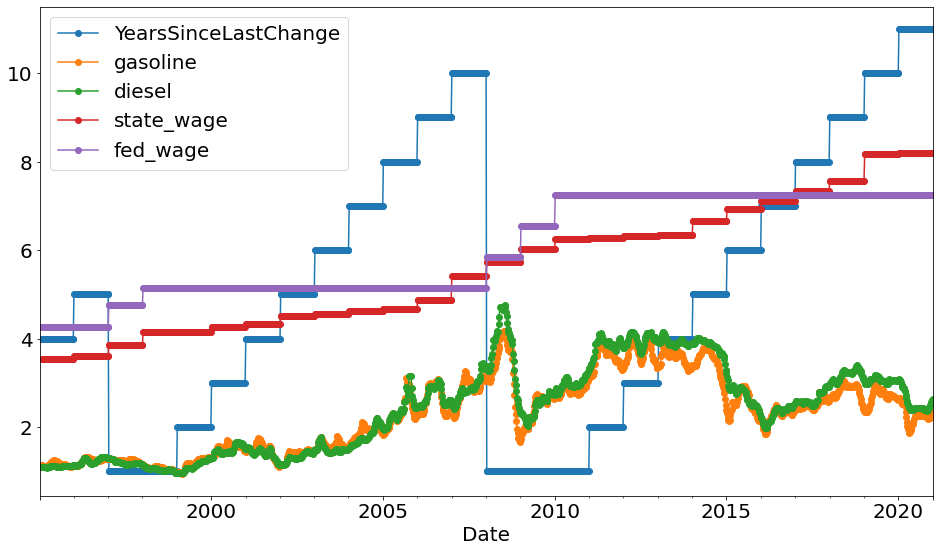

In [32]:
df.resample('W').mean() # Every 3 weeks
df.resample('W').mean().plot(marker='o')

<AxesSubplot:xlabel='Date'>

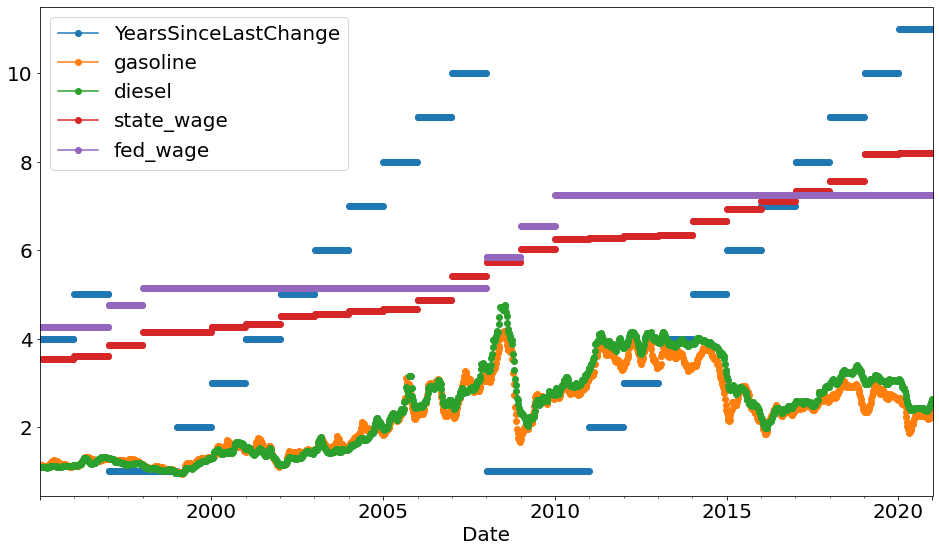

In [33]:
df.resample('D').mean() # Every 3 weeks
df.resample('D').mean().plot(marker='o')

Summary :

In [34]:
df.isnull().sum() # number null values in each column

State                       0
MeanAnnualInflation         0
UnemploymentRateDecember    0
GDP_AnnualGrowth            0
PresParty                   0
SenParty                    0
HouseParty                  0
YearsSinceLastChange        0
gasoline                    0
diesel                      0
state_wage                  0
fed_wage                    0
dtype: int64

In [35]:
df.State.unique() # unique values

array(['Alabama', 'Alaska', 'Arizona', 'Arkansas', 'California',
       'Colorado', 'Connecticut', 'Delaware', 'District of Columbia',
       'Florida', 'Georgia', 'Guam', 'Hawaii', 'Idaho', 'Illinois',
       'Indiana', 'Iowa', 'Kansas', 'Kentucky', 'Louisiana', 'Maine',
       'Maryland', 'Massachusetts', 'Michigan', 'Minnesota',
       'Mississippi', 'Missouri', 'Montana', 'Nebraska', 'Nevada',
       'New Hampshire', 'New Jersey', 'New Mexico', 'New York',
       'North Carolina', 'North Dakota', 'Ohio', 'Oklahoma', 'Oregon',
       'Pennsylvania', 'Puerto Rico', 'Rhode Island', 'South Carolina',
       'South Dakota', 'Tennessee', 'Texas', 'U.S. Virgin Islands',
       'Utah', 'Vermont', 'Virginia', 'Washington', 'West Virginia',
       'Wisconsin', 'Wyoming'], dtype=object)

In [36]:
df.gasoline.describe()

count    73278.000000
mean         2.285283
std          0.859946
min          0.949000
25%          1.459000
50%          2.322000
75%          2.906000
max          4.165000
Name: gasoline, dtype: float64

In [37]:
df.gasoline.min(), df.gasoline.max()

(0.949, 4.165)

In [38]:
df['month'] = df.index.strftime('%m-%b')
df.head(1)

,State,MeanAnnualInflation,UnemploymentRateDecember,GDP_AnnualGrowth,PresParty,SenParty,HouseParty,YearsSinceLastChange,gasoline,diesel,state_wage,fed_wage,month
Date,,,,,,,,,,,,,
1995-01-02,Alabama,2.80%,5.60%,2.70%,Democrat,Republican,Republican,4,1.127,1.104,0.0,4.25,01-Jan


In [39]:
df['gas_fed_min'] = df.gasoline / df.fed_wage
df.head(1)

,State,MeanAnnualInflation,UnemploymentRateDecember,GDP_AnnualGrowth,PresParty,SenParty,HouseParty,YearsSinceLastChange,gasoline,diesel,state_wage,fed_wage,month,gas_fed_min
Date,,,,,,,,,,,,,,
1995-01-02,Alabama,2.80%,5.60%,2.70%,Democrat,Republican,Republican,4,1.127,1.104,0.0,4.25,01-Jan,0.265176


In [40]:
df['gas_state_min'] = df.gasoline / df.state_wage
df.head(1)

,State,MeanAnnualInflation,UnemploymentRateDecember,GDP_AnnualGrowth,PresParty,SenParty,HouseParty,YearsSinceLastChange,gasoline,diesel,state_wage,fed_wage,month,gas_fed_min,gas_state_min
Date,,,,,,,,,,,,,,,
1995-01-02,Alabama,2.80%,5.60%,2.70%,Democrat,Republican,Republican,4,1.127,1.104,0.0,4.25,01-Jan,0.265176,inf


In [41]:
df.gas_state_min.min()

0.1335714285714286

In [42]:
print('Date Range:', df.index.min(), 'to', df.index.max())
print('Shape:', df.shape)

df.head(10)

Date Range: 1995-01-02 00:00:00 to 2020-12-28 00:00:00
Shape: (73278, 15)


,State,MeanAnnualInflation,UnemploymentRateDecember,GDP_AnnualGrowth,PresParty,SenParty,HouseParty,YearsSinceLastChange,gasoline,diesel,state_wage,fed_wage,month,gas_fed_min,gas_state_min
Date,,,,,,,,,,,,,,,
1995-01-02,Alabama,2.80%,5.60%,2.70%,Democrat,Republican,Republican,4,1.127,1.104,0.0,4.25,01-Jan,0.265176,inf
1995-01-09,Alabama,2.80%,5.60%,2.70%,Democrat,Republican,Republican,4,1.134,1.102,0.0,4.25,01-Jan,0.266824,inf
1995-01-16,Alabama,2.80%,5.60%,2.70%,Democrat,Republican,Republican,4,1.126,1.100,0.0,4.25,01-Jan,0.264941,inf
1995-01-23,Alabama,2.80%,5.60%,2.70%,Democrat,Republican,Republican,4,1.132,1.095,0.0,4.25,01-Jan,0.266353,inf
1995-01-30,Alabama,2.80%,5.60%,2.70%,Democrat,Republican,Republican,4,1.131,1.090,0.0,4.25,01-Jan,0.266118,inf
1995-02-06,Alabama,2.80%,5.60%,2.70%,Democrat,Republican,Republican,4,1.124,1.086,0.0,4.25,02-Feb,0.264471,inf
1995-02-13,Alabama,2.80%,5.60%,2.70%,Democrat,Republican,Republican,4,1.121,1.088,0.0,4.25,02-Feb,0.263765,inf
1995-02-20,Alabama,2.80%,5.60%,2.70%,Democrat,Republican,Republican,4,1.115,1.088,0.0,4.25,02-Feb,0.262353,inf
1995-02-27,Alabama,2.80%,5.60%,2.70%,Democrat,Republican,Republican,4,1.121,1.089,0.0,4.25,02-Feb,0.263765,inf


## Splitting data

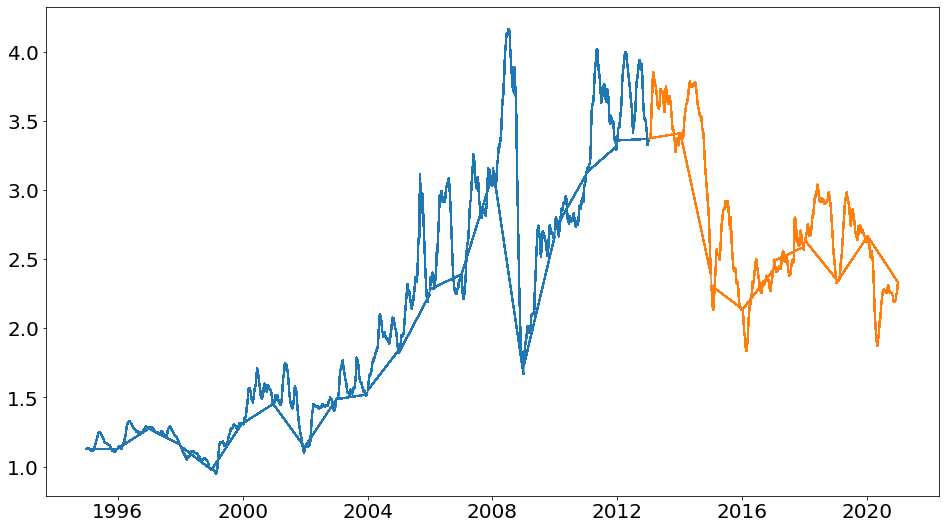

In [43]:
train_size = .70
n = df.shape[0]
test_start_index = round(train_size * n)

train = df[:test_start_index] # everything up (not including) to the test_start_index
test = df[test_start_index:] # everything from the test_start_index to the end

plt.plot(train.index, train.gasoline)
plt.plot(test.index, test.gasoline)


/var/folders/dc/8rtfvpyj2mb6mqbnfkf5dl400000gn/T/ipykernel_28795/2316967509.py:2: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.
  test = df['2013']


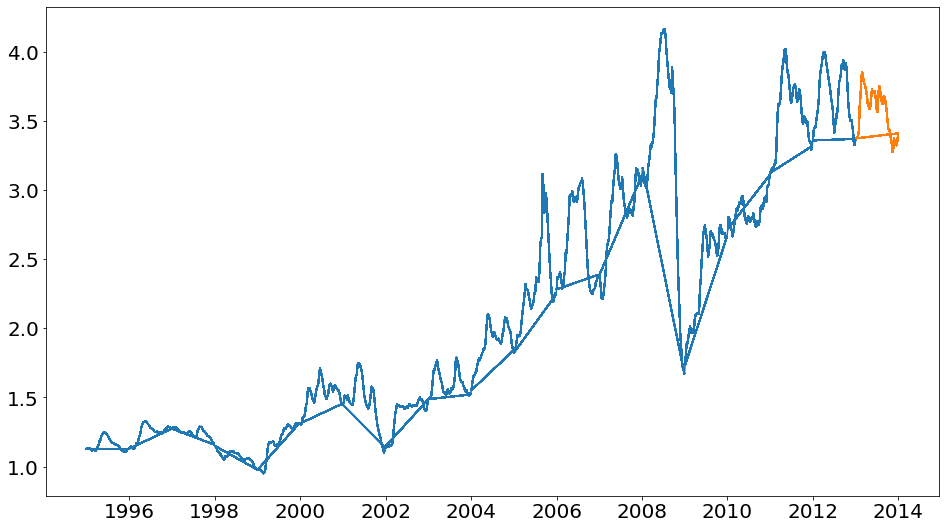

In [44]:
train = df[:'2012'] # includes 2012
test = df['2013']

plt.plot(train.index, train.gasoline)
plt.plot(test.index, test.gasoline)

In [45]:
y = train.gasoline
y.head()


Date
1995-01-02    1.127
1995-01-09    1.134
1995-01-16    1.126
1995-01-23    1.132
1995-01-30    1.131
Name: gasoline, dtype: float64

<AxesSubplot:ylabel='Frequency'>

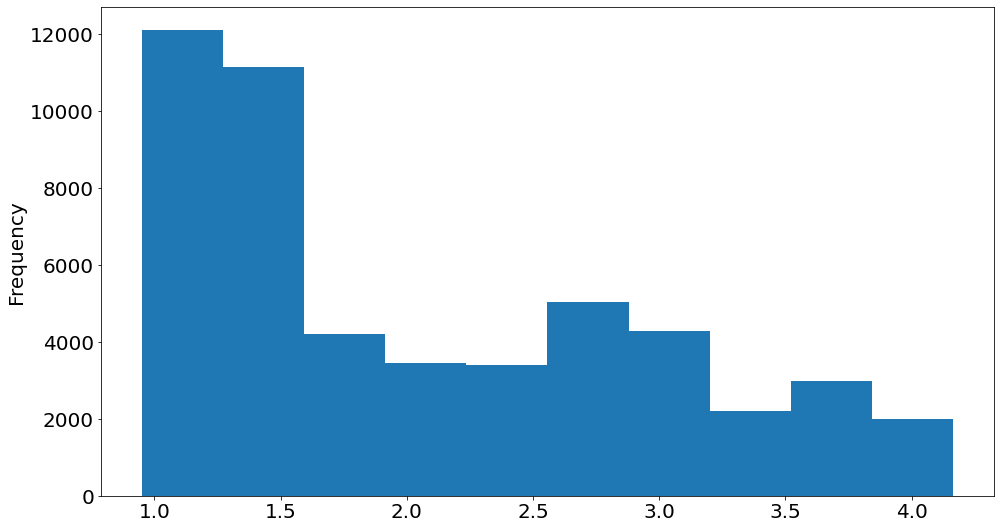

In [46]:
y.plot.hist()


[Text(0.5, 1.0, 'Average gas price by Month'),
 Text(0.5, 0, 'Month'),
 Text(0, 0.5, 'gas price (usd)')]

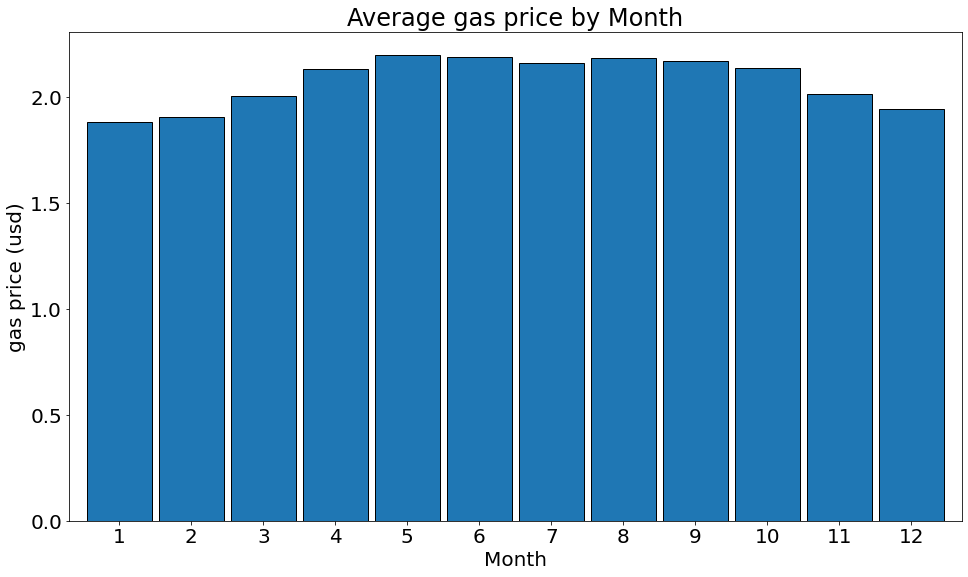

In [47]:
ax = y.groupby(y.index.month).mean().plot.bar(width=.9, ec='black')
plt.xticks(rotation=0)
ax.set(title='Average gas price by Month', xlabel='Month', ylabel='gas price (usd)')


[Text(0.5, 1.0, 'Average gas price by Weekday'),
 Text(0.5, 26.200000000000003, 'Weekday'),
 Text(26.200000000000017, 0.5, 'gas price (usd)')]

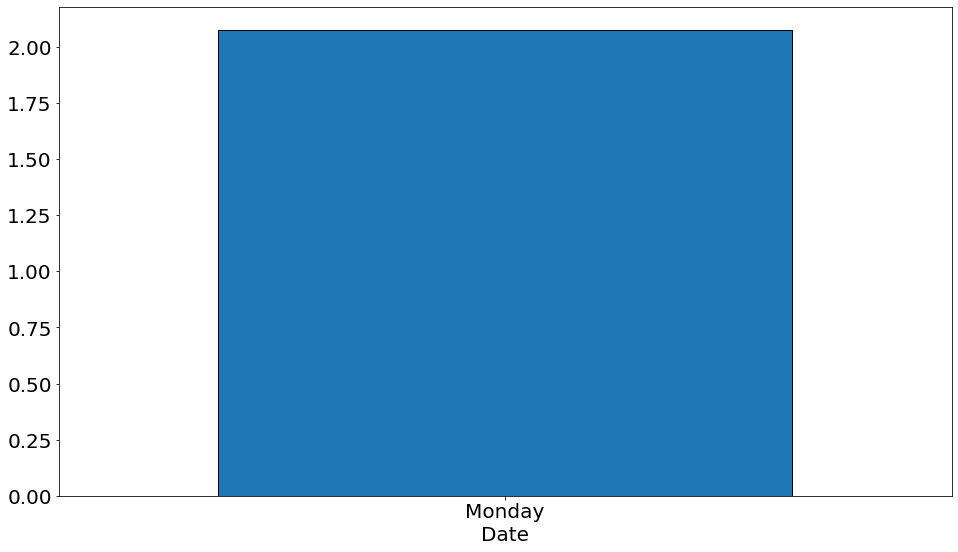

In [48]:
y.groupby(y.index.day_name()).mean().plot.bar(width=.9, ec='black')
plt.xticks(rotation=0)
ax.set(title='Average gas price by Weekday', xlabel='Weekday', ylabel='gas price (usd)')


In [49]:
y

Date
1995-01-02    1.127
1995-01-09    1.134
1995-01-16    1.126
1995-01-23    1.132
1995-01-30    1.131
              ...  
2012-12-03    3.463
2012-12-10    3.419
2012-12-17    3.324
2012-12-24    3.328
2012-12-31    3.369
Name: gasoline, Length: 50760, dtype: float64

<AxesSubplot:xlabel='weekday', ylabel='gasoline'>

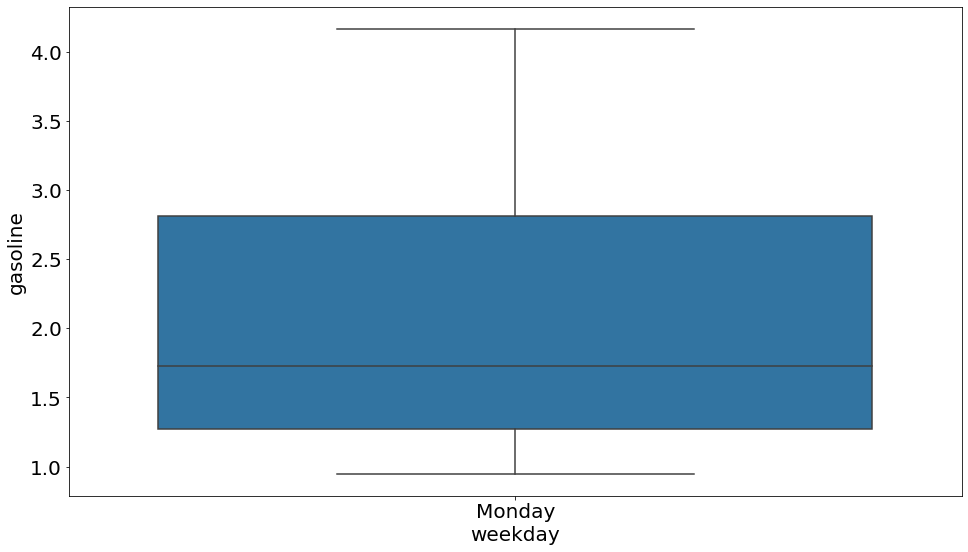

In [50]:
(
    y.reset_index()
    .assign(weekday=lambda df: df.Date.dt.day_name())
    .pipe((sns.boxplot, 'data'), y='gasoline', x='weekday')
)


<AxesSubplot:xlabel='Date'>

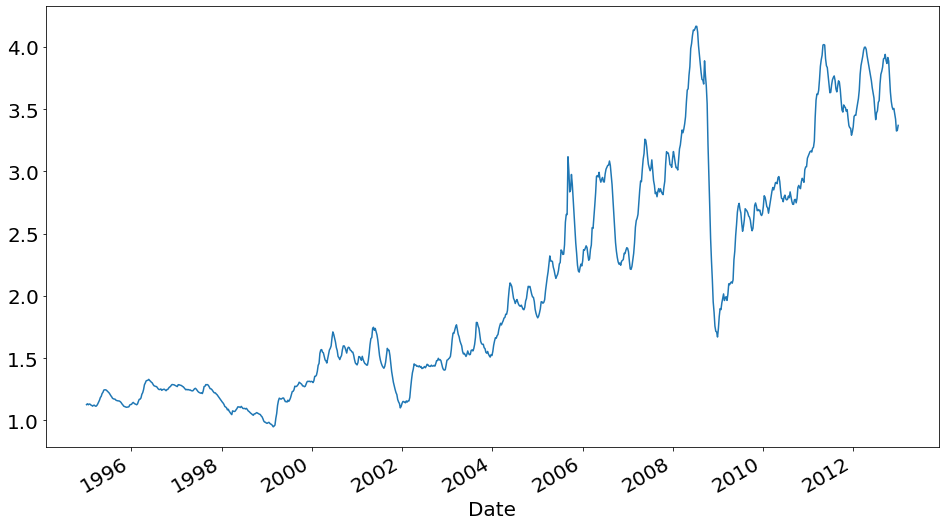

In [51]:
y.plot()

<AxesSubplot:title={'center':'Week average'}, xlabel='Date'>

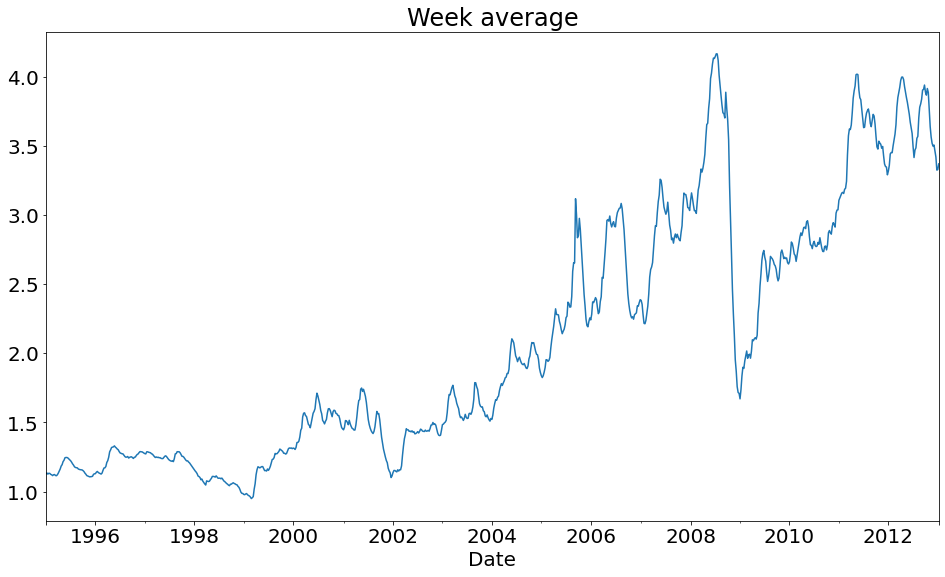

In [52]:
y.resample('W').mean().plot(title='Week average')


<AxesSubplot:title={'center':'Month average'}, xlabel='Date'>

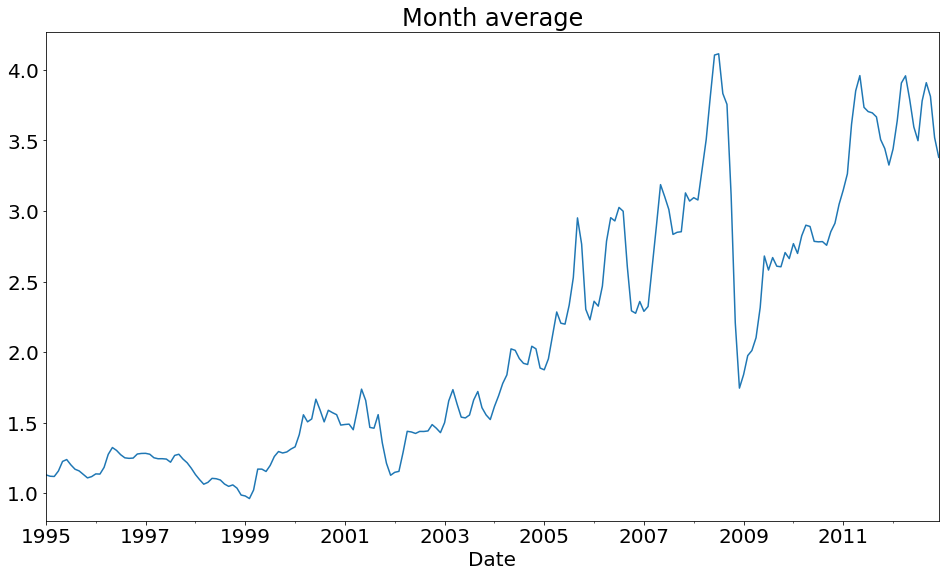

In [53]:
y.resample('M').mean().plot(title='Month average')

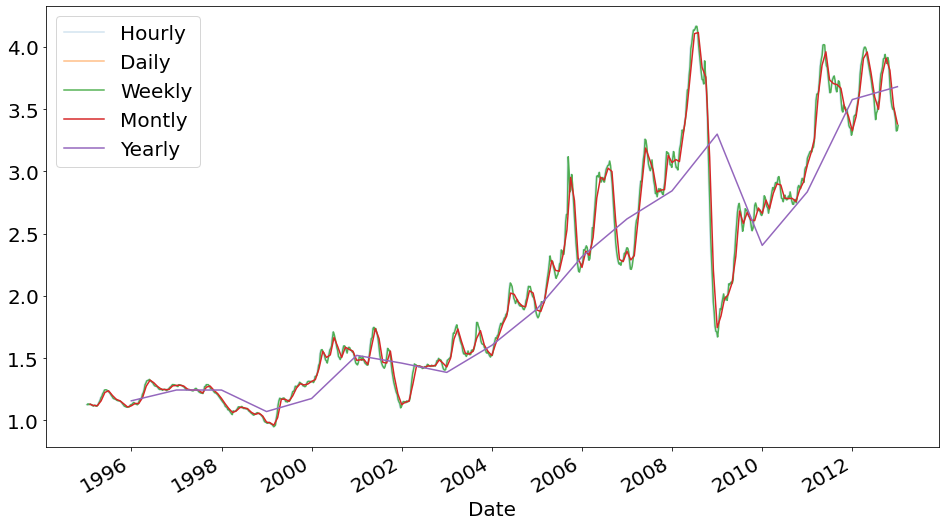

In [54]:
y.plot(alpha=.2, label='Hourly')
y.resample('D').mean().plot(alpha=.5, label='Daily')
y.resample('W').mean().plot(alpha=.8, label='Weekly')
y.resample('M').mean().plot(label='Montly')
y.resample('Y').mean().plot(label='Yearly')
plt.legend()


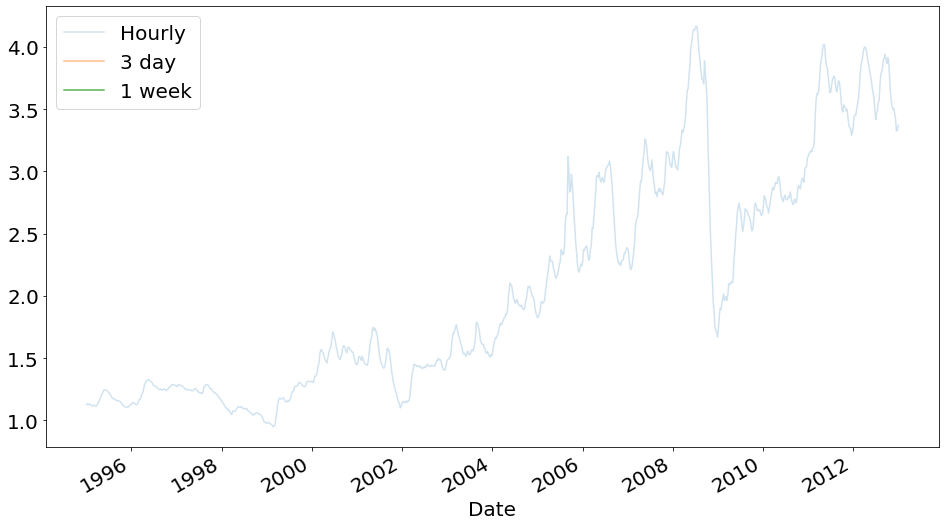

In [55]:
y.plot(alpha=.2, label='Hourly')
y.resample('D').mean().rolling(3).mean().plot(alpha=.5, label='3 day')
y.resample('D').mean().rolling(7).mean().plot(alpha=.8, label='1 week')
plt.legend()


<AxesSubplot:title={'center':'Average week-to-week change in gas price'}, xlabel='Date'>

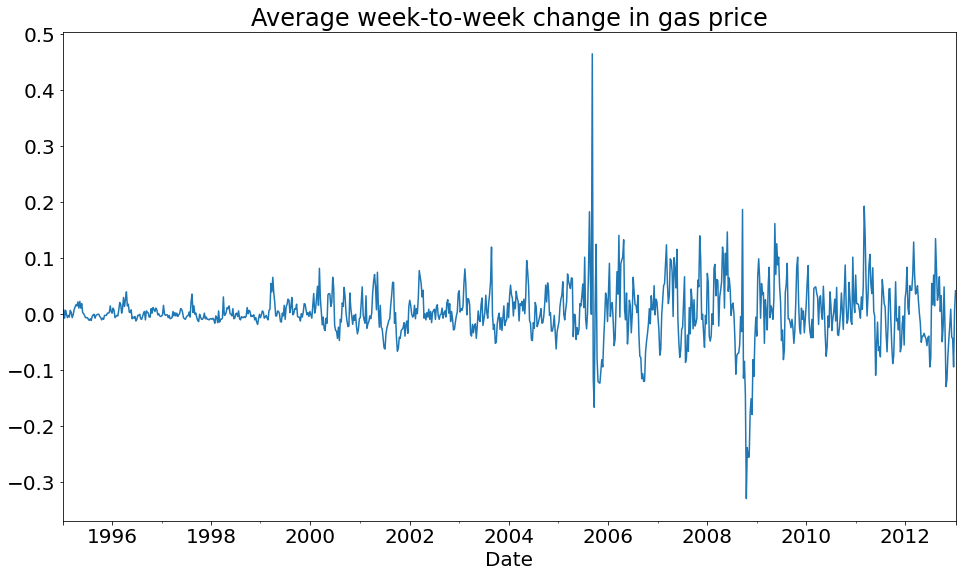

In [56]:
y.resample('W').mean().diff().plot(title='Average week-to-week change in gas price')


<AxesSubplot:title={'center':'Average month-to-month change in gas prices'}, xlabel='Date'>

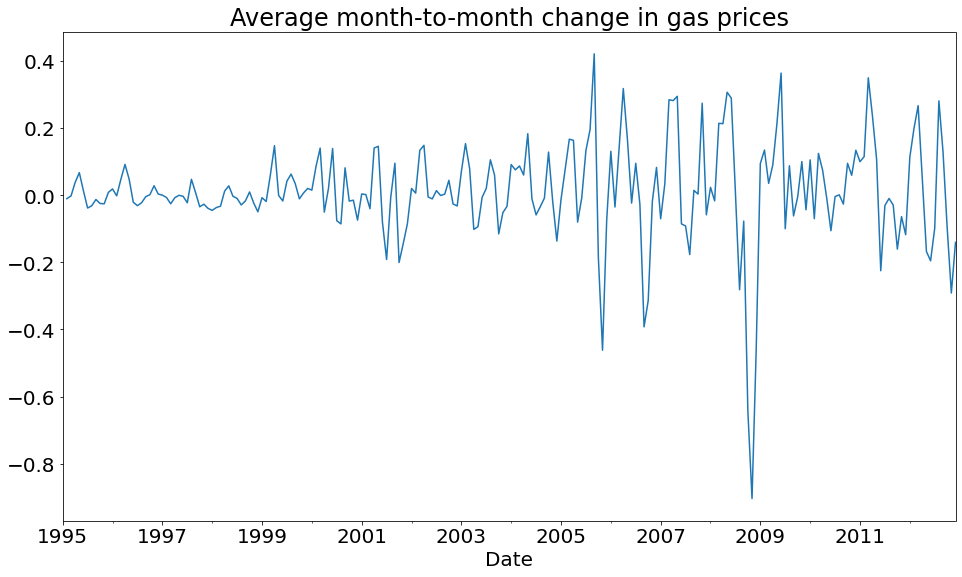

In [57]:
y.resample('M').mean().diff().plot(title='Average month-to-month change in gas prices')


<AxesSubplot:title={'center':'Seasonal Plot'}, xlabel='Date'>

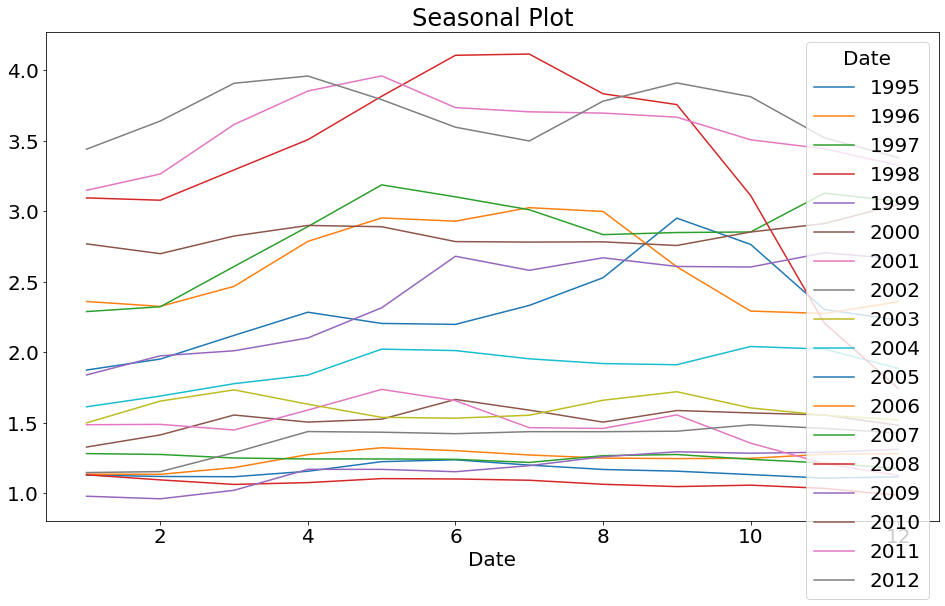

In [58]:
# .unstack turns an index level into columns
y.groupby([y.index.year, y.index.month]).mean().unstack(0).plot(title='Seasonal Plot')


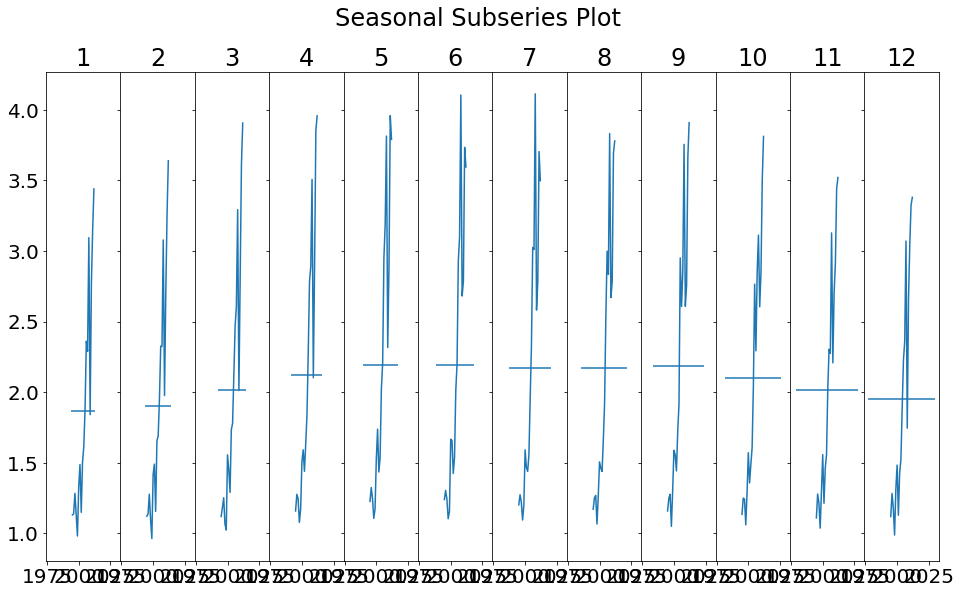

In [59]:
table = y.groupby([y.index.year, y.index.month]).mean().unstack()

fig, axs = plt.subplots(1, 12, sharey=True, sharex=True)
for ax, (month, subset) in zip(axs, table.iteritems()):
    subset.plot(ax=ax, title=month)
    ax.hlines(subset.mean(), *ax.get_xlim())
    ax.set(xlabel='')

fig.suptitle('Seasonal Subseries Plot') # super-title for the overall figure
fig.subplots_adjust(wspace=0)

Text(0.5, 1.0, 'Lag plot with lag=1')

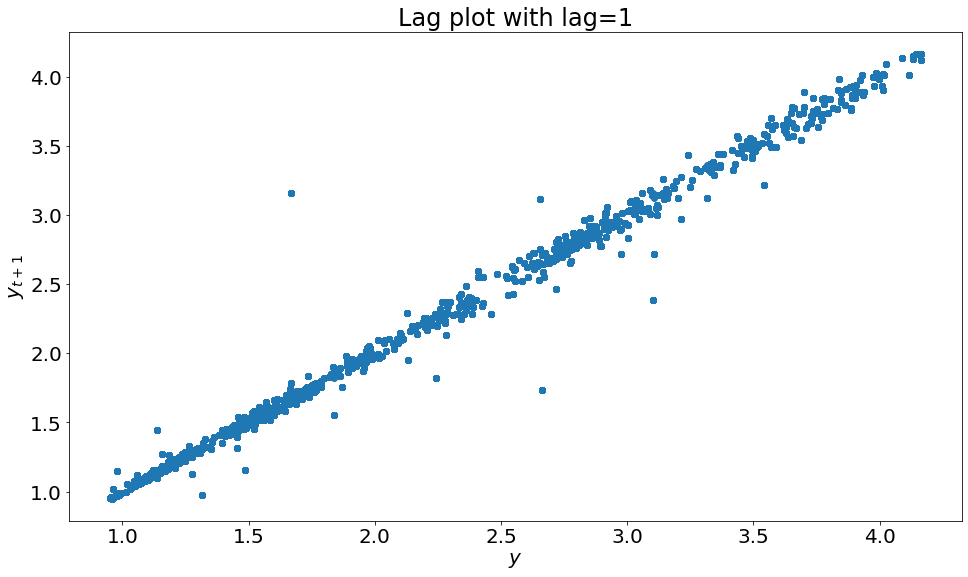

In [60]:
plt.scatter(y, y.shift(-1))
plt.xlabel('$y$')
plt.ylabel('$y_{t + 1}$')
plt.title('Lag plot with lag=1')


/var/folders/dc/8rtfvpyj2mb6mqbnfkf5dl400000gn/T/ipykernel_28795/1240324727.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train['y(t + 1)'] = train.gasoline.shift(-1)


[Text(0.5, 0, 't'), Text(0, 0.5, 't + 1')]

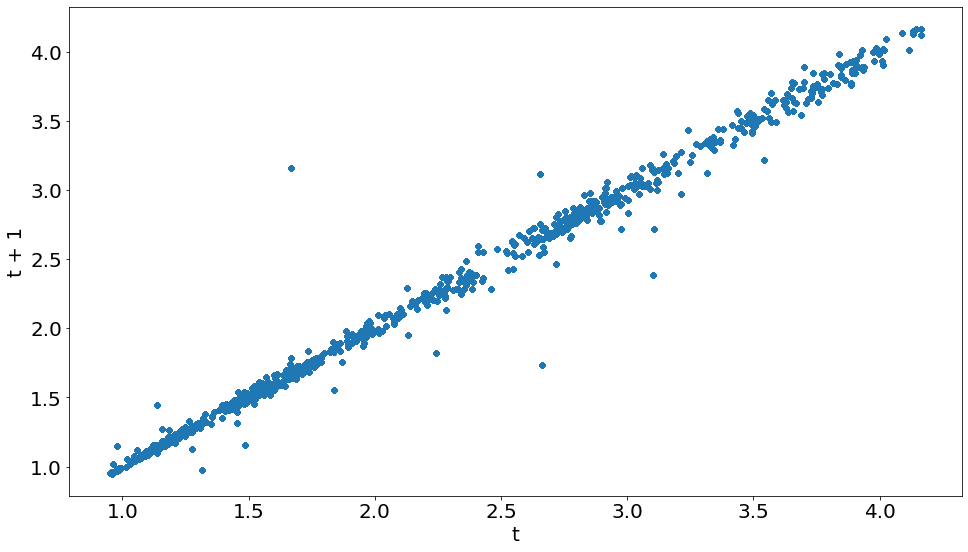

In [61]:
train['y(t + 1)'] = train.gasoline.shift(-1)
ax = train.plot.scatter(x='gasoline', y='y(t + 1)')
ax.set(xlabel='t', ylabel='t + 1')


In [62]:
del train['y(t + 1)']


,YearsSinceLastChange,this_weeks_price,diesel,state_wage,fed_wage,gas_fed_min,gas_state_min,next_week_gas_price
Date,,,,,,,,
1995-01-08,4.0,1.127,1.104,3.542963,4.25,0.265176,NaN,1.134
1995-01-15,4.0,1.134,1.102,3.542963,4.25,0.266824,NaN,1.126
1995-01-22,4.0,1.126,1.100,3.542963,4.25,0.264941,NaN,1.132
1995-01-29,4.0,1.132,1.095,3.542963,4.25,0.266353,NaN,1.131
1995-02-05,4.0,1.131,1.090,3.542963,4.25,0.266118,NaN,1.124
...,...,...,...,...,...,...,...,...
2012-12-09,3.0,3.463,4.027,6.321481,7.25,0.477655,NaN,3.419
2012-12-16,3.0,3.419,3.991,6.321481,7.25,0.471586,NaN,3.324
2012-12-23,3.0,3.324,3.945,6.321481,7.25,0.458483,NaN,3.328


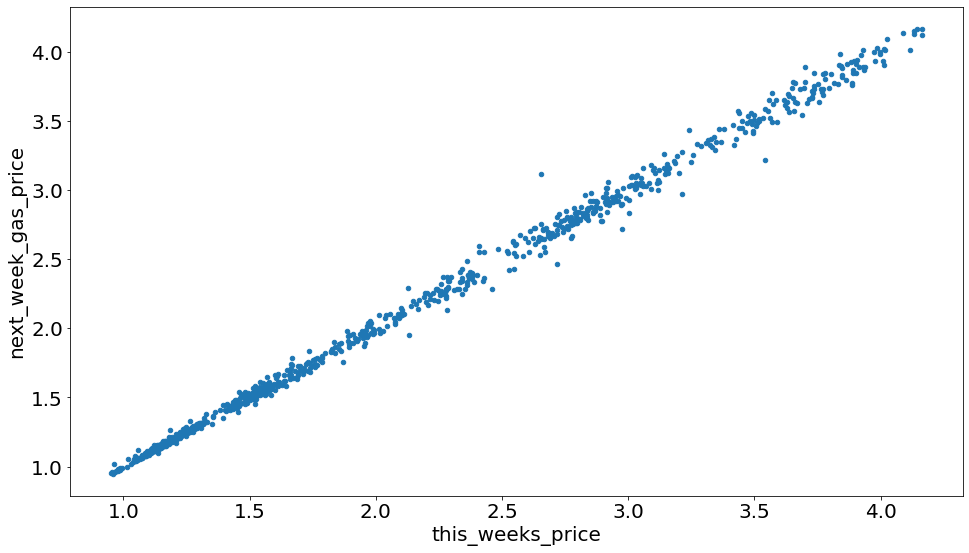

In [63]:
weekly = train.resample('W').mean()
weekly['next_week_gas_price'] = weekly.gasoline.shift(-1)
weekly = weekly.rename(columns={'gasoline': 'this_weeks_price'})
weekly.plot.scatter(x='this_weeks_price', y='next_week_gas_price')
weekly

,YearsSinceLastChange,this_week,diesel,state_wage,fed_wage,gas_fed_min,gas_state_min,12_weeks_out
Date,,,,,,,,
1995-01-08,4.0,1.127,1.104,3.542963,4.25,0.265176,NaN,1.121
1995-01-15,4.0,1.134,1.102,3.542963,4.25,0.266824,NaN,1.133
1995-01-22,4.0,1.126,1.100,3.542963,4.25,0.264941,NaN,1.149
1995-01-29,4.0,1.132,1.095,3.542963,4.25,0.266353,NaN,1.163
1995-02-05,4.0,1.131,1.090,3.542963,4.25,0.266118,NaN,1.184
...,...,...,...,...,...,...,...,...
2012-12-09,3.0,3.463,4.027,6.321481,7.25,0.477655,NaN,NaN
2012-12-16,3.0,3.419,3.991,6.321481,7.25,0.471586,NaN,NaN
2012-12-23,3.0,3.324,3.945,6.321481,7.25,0.458483,NaN,NaN


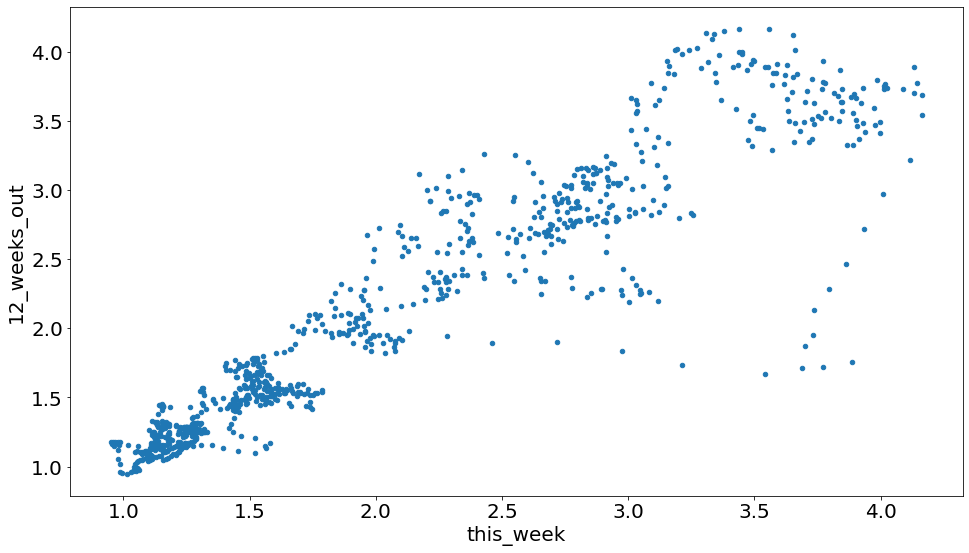

In [64]:
weekly = train.resample('W').mean()
weekly['12_weeks_out'] = weekly.gasoline.shift(-12)
weekly = weekly.rename(columns={'gasoline': 'this_week'})
weekly.plot.scatter(x='this_week', y='12_weeks_out')
weekly

,YearsSinceLastChange,this_week,diesel,state_wage,fed_wage,gas_fed_min,gas_state_min,half_a_year_later
Date,,,,,,,,
1995-01-08,4.0,1.127,1.104,3.542963,4.25,0.265176,NaN,1.222
1995-01-15,4.0,1.134,1.102,3.542963,4.25,0.266824,NaN,1.212
1995-01-22,4.0,1.126,1.100,3.542963,4.25,0.264941,NaN,1.200
1995-01-29,4.0,1.132,1.095,3.542963,4.25,0.266353,NaN,1.191
1995-02-05,4.0,1.131,1.090,3.542963,4.25,0.266118,NaN,1.179
...,...,...,...,...,...,...,...,...
2012-12-09,3.0,3.463,4.027,6.321481,7.25,0.477655,NaN,NaN
2012-12-16,3.0,3.419,3.991,6.321481,7.25,0.471586,NaN,NaN
2012-12-23,3.0,3.324,3.945,6.321481,7.25,0.458483,NaN,NaN


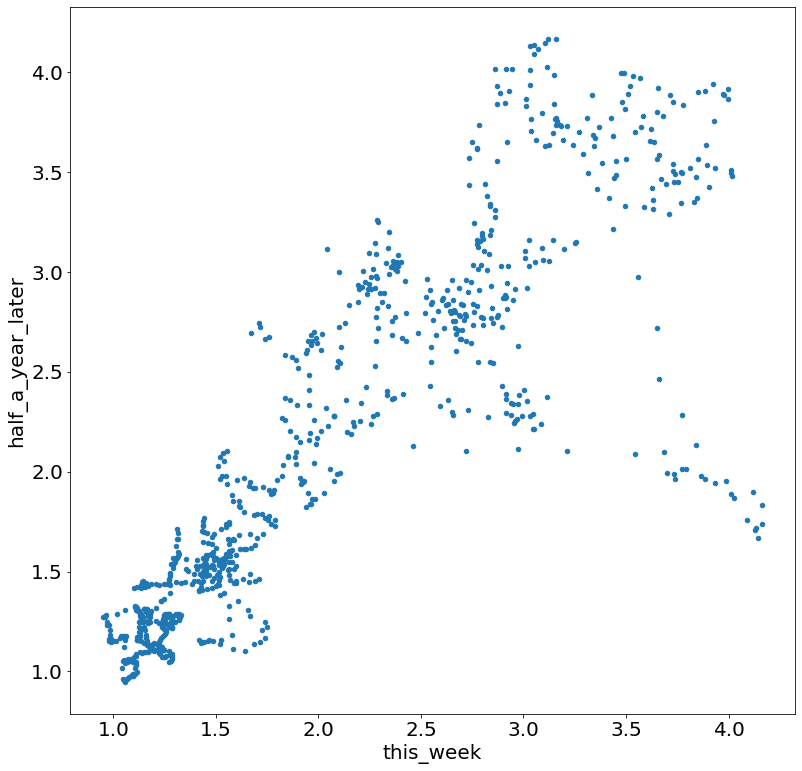

In [65]:
weekly = train.resample('W').mean()
weekly['half_a_year_later'] = weekly.gasoline.shift(-26)
weekly = weekly.rename(columns={'gasoline': 'this_week'})
weekly.plot.scatter(x='this_week', y='half_a_year_later', figsize=(13, 13))
weekly


<AxesSubplot:xlabel='y(t)', ylabel='y(t + 26)'>

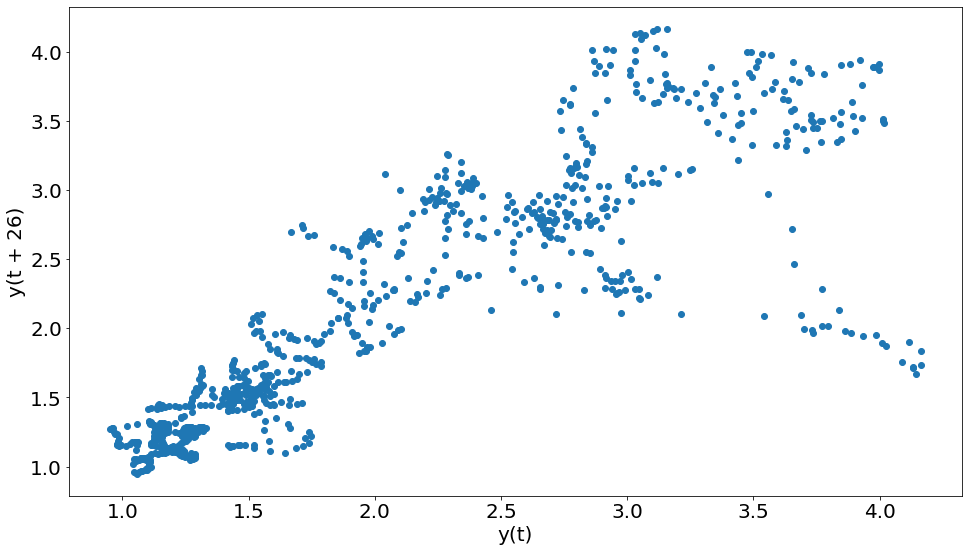

In [66]:
pd.plotting.lag_plot(train.gasoline.resample('W').mean(), lag=26)

<AxesSubplot:xlabel='Lag', ylabel='Autocorrelation'>

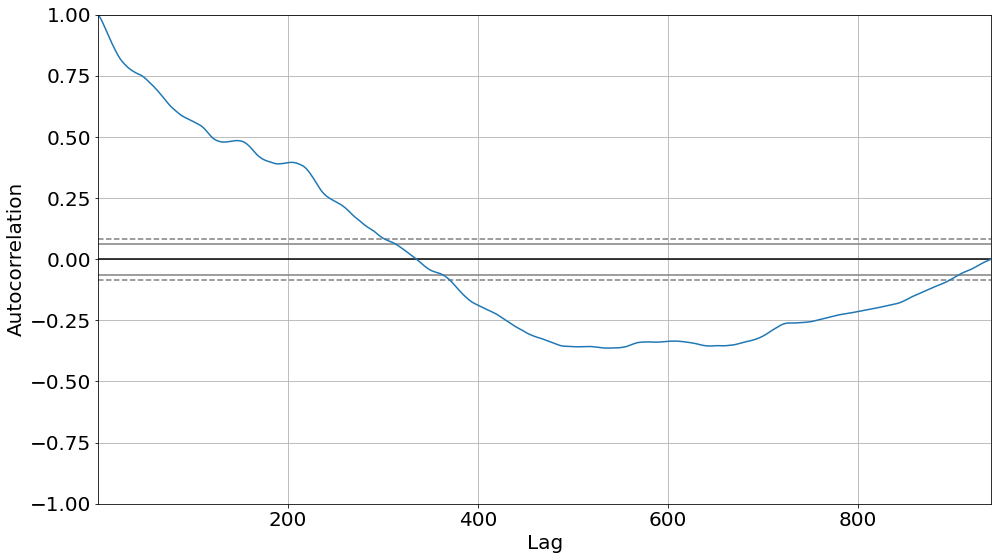

In [67]:
pd.plotting.autocorrelation_plot(train.gasoline.resample('W').mean())

In [68]:
y = train.gasoline.resample('W').mean()

result = sm.tsa.seasonal_decompose(y)
decomposition = pd.DataFrame({
    'y': result.observed,
    'trend': result.trend,
    'seasonal': result.seasonal,
    'resid': result.resid,
})
decomposition.head()


,y,trend,seasonal,resid
Date,,,,
1995-01-08,1.127,NaN,-0.186673,NaN
1995-01-15,1.134,NaN,-0.192849,NaN
1995-01-22,1.126,NaN,-0.181138,NaN
1995-01-29,1.132,NaN,-0.159047,NaN
1995-02-05,1.131,NaN,-0.148247,NaN


<AxesSubplot:xlabel='Date'>

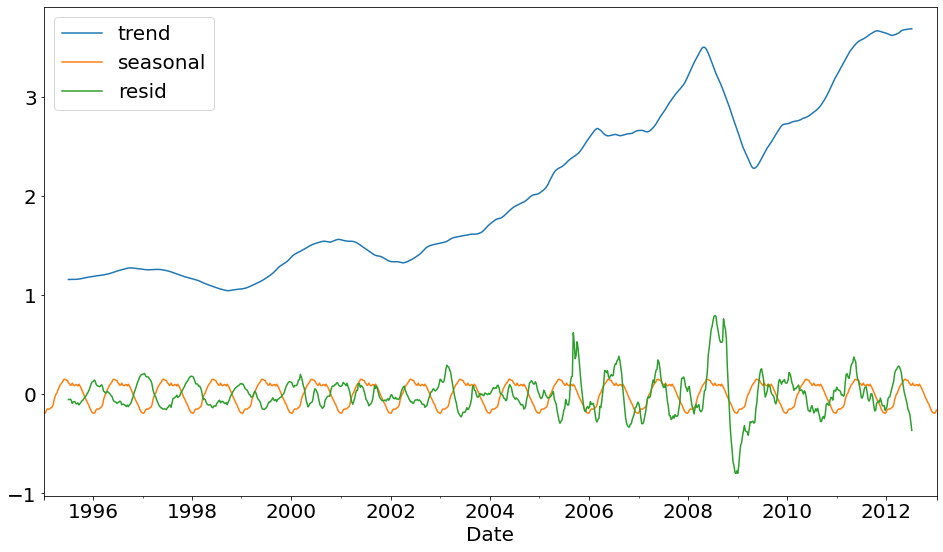

In [69]:
decomposition.iloc[:, 1:].plot()

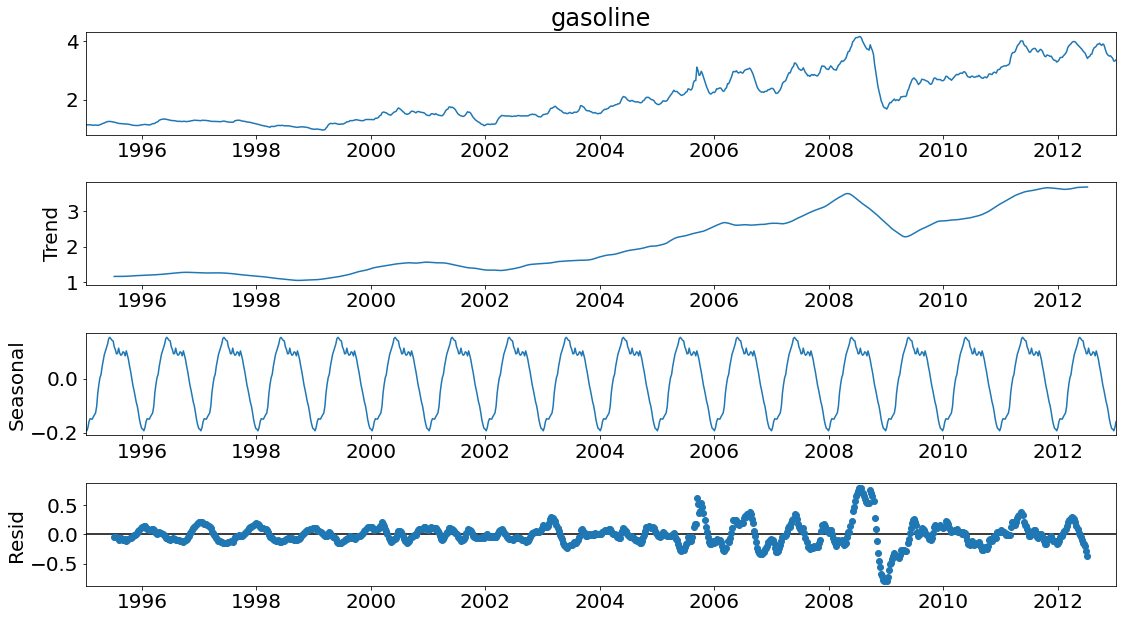

In [70]:
# the value returned from seasonal_decompose can itself be plotted:
result.plot()
None

### Categories over time
How can we visualize categories over time?

In [71]:
train = train.resample('W').mean()
# create a categorical feature
train['gasprice_bin'] = pd.qcut(train.gasoline, 4, labels=['lowest', 'low', 'medium', 'high'])
train.groupby('gasprice_bin').mean()


,YearsSinceLastChange,gasoline,diesel,state_wage,fed_wage,gas_fed_min,gas_state_min
gasprice_bin,,,,,,,
lowest,2.673729,1.156297,1.124331,3.905366,4.749153,0.245888,NaN
low,4.222222,1.478205,1.426863,4.323382,5.070513,0.291668,NaN
medium,5.370213,2.291043,2.367762,5.245096,5.730851,0.402749,NaN
high,3.987234,3.376017,3.597017,5.890325,6.427872,0.532631,NaN


Text(0, 0.5, '% of days in the month')

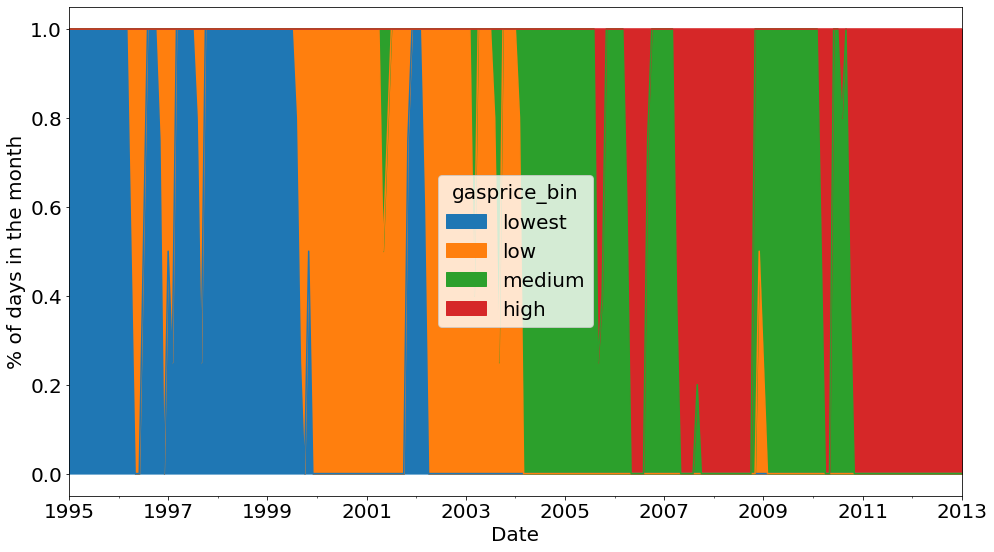

In [72]:
(train.groupby('gasprice_bin')
 .resample('M')
 .size()
 .unstack(0)
 .apply(lambda row: row / row.sum(), axis=1)
 .plot.area()
)
plt.ylabel('% of days in the month')


/var/folders/dc/8rtfvpyj2mb6mqbnfkf5dl400000gn/T/ipykernel_28795/1174628149.py:1: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.
  ax = (train['2008']


[Text(0, 0, 'January'),
 Text(1, 0, 'February'),
 Text(2, 0, 'March'),
 Text(3, 0, 'April'),
 Text(4, 0, 'May'),
 Text(5, 0, 'June'),
 Text(6, 0, 'July'),
 Text(7, 0, 'August'),
 Text(8, 0, 'September'),
 Text(9, 0, 'October'),
 Text(10, 0, 'November'),
 Text(11, 0, 'December')]

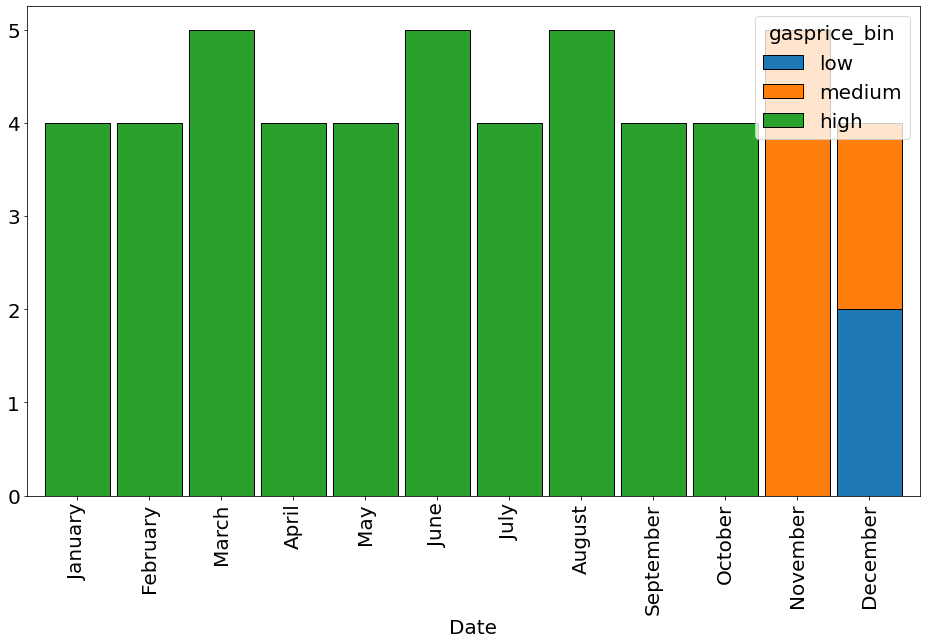

In [73]:
ax = (train['2008']
 .groupby('gasprice_bin')
 .resample('M')
 .size()
 .unstack(0)
 .plot.bar(stacked=True, width=.9, ec='black')
)
labels = [pd.to_datetime(t.get_text()).strftime('%B') for t in ax.get_xticklabels()]
ax.set_xticklabels(labels)


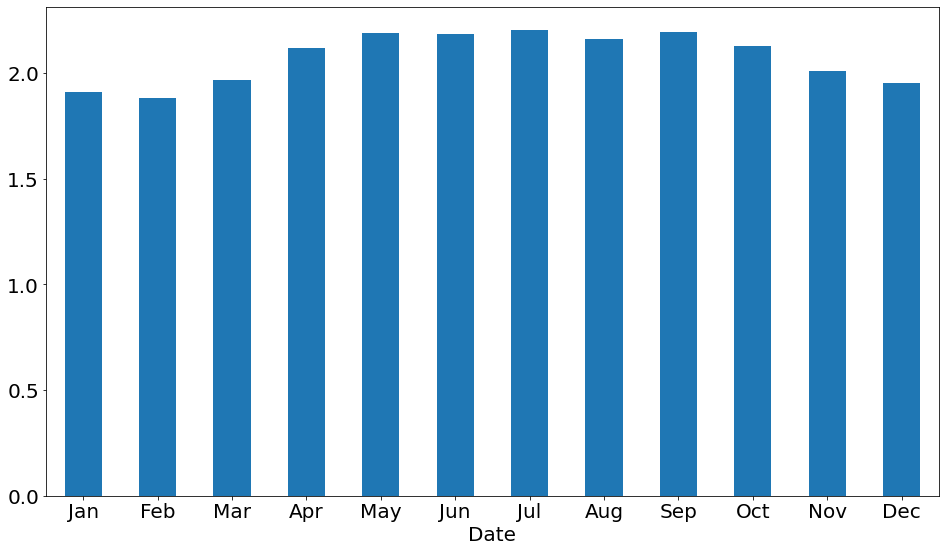

In [74]:
ax = y.groupby(y.index.strftime('%m-%b')).mean().plot.bar()
ax.set_xticklabels([t.get_text()[3:] for t in ax.get_xticklabels()], rotation=0)
None


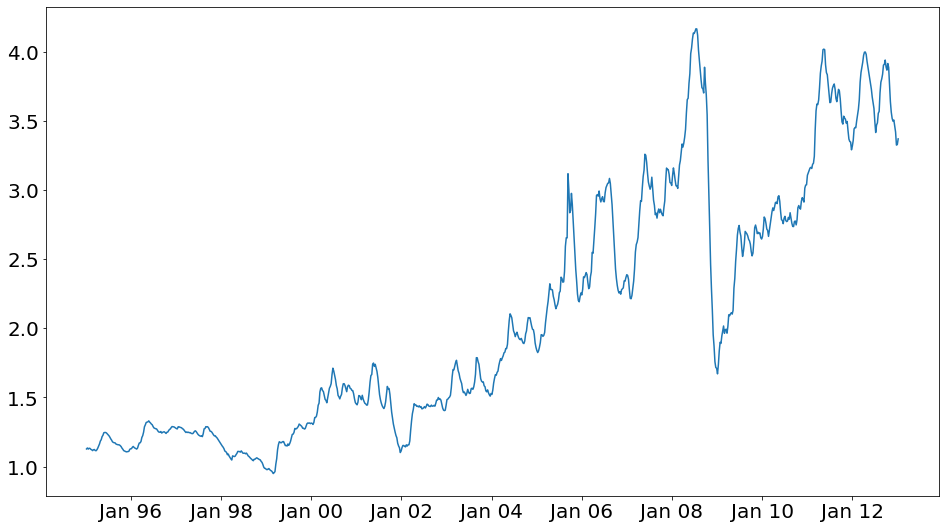

In [75]:
from matplotlib.dates import DateFormatter

fig, ax = plt.subplots()

weekly = y.resample('W').mean()

ax.plot(weekly.index, weekly)

ax.xaxis.set_major_formatter(DateFormatter('%b %y'))


In [76]:
df.columns

Index(['State', 'MeanAnnualInflation', 'UnemploymentRateDecember',
       'GDP_AnnualGrowth', 'PresParty', 'SenParty', 'HouseParty',
       'YearsSinceLastChange', 'gasoline', 'diesel', 'state_wage', 'fed_wage',
       'month', 'gas_fed_min', 'gas_state_min'],
      dtype='object')

In [77]:
#dropping additional columns to focus on the two main subjects
df = df.drop(columns= ['State', 'MeanAnnualInflation', 'UnemploymentRateDecember',
       'GDP_AnnualGrowth', 'PresParty', 'SenParty', 'HouseParty',
       'YearsSinceLastChange', 'diesel', 'state_wage',
       'month', 'gas_fed_min', 'gas_state_min'])
df

,gasoline,fed_wage
Date,,
1995-01-02,1.127,4.25
1995-01-09,1.134,4.25
1995-01-16,1.126,4.25
1995-01-23,1.132,4.25
1995-01-30,1.131,4.25
...,...,...
2020-11-30,2.211,7.25
2020-12-07,2.246,7.25
2020-12-14,2.247,7.25


In [78]:
df_resampled = df.resample('M')[['gasoline','fed_wage']].mean()
df_resampled.head()

,gasoline,fed_wage
Date,,
1995-01-31,1.13000,4.25
1995-02-28,1.12025,4.25
1995-03-31,1.11850,4.25
1995-04-30,1.15725,4.25
1995-05-31,1.22520,4.25


In [79]:
df_resampled.shape


(312, 2)

In [80]:
# set train size to be 50% of total 
train_size = int(round(df_resampled.shape[0] * 0.5))
train_size

156

In [81]:
# set validate size to be 30% of total 
validate_size = int(round(df_resampled.shape[0] * 0.3))
validate_size

94

In [82]:
# set test size to be number of rows remaining. 
test_size = int(round(df_resampled.shape[0] * 0.2))
test_size

62

In [83]:
len(df_resampled) == train_size + validate_size + test_size

True

In [84]:
# validate will go from 912 to 912+547
validate_end_index = train_size + validate_size
validate_end_index
# train will go from 0 to 911
train = df_resampled[:train_size]
# validate will go from 912 to 1458
validate = df_resampled[train_size:validate_end_index]
# test will include 1459 to the end
test = df_resampled[validate_end_index:]

In [85]:
train.head()

,gasoline,fed_wage
Date,,
1995-01-31,1.13000,4.25
1995-02-28,1.12025,4.25
1995-03-31,1.11850,4.25
1995-04-30,1.15725,4.25
1995-05-31,1.22520,4.25


In [86]:
train.shape[0], validate.shape[0], test.shape[0]

(156, 94, 62)

### Verify Splits

Does the length of each df equate to the length of the original df?

In [87]:
# is len of train + validate + test == lenght of entire dataframe. 
len(train) + len(validate) + len(test) == len(df_resampled)

True

In [88]:
#Does the first row of original df equate to the first row of train?
print(df_resampled.head(1) == train.head(1))

            gasoline  fed_wage
Date                          
1995-01-31      True      True


In [89]:
pd.concat([train.tail(1), validate.head(1)])

,gasoline,fed_wage
Date,,
2007-12-31,3.0704,5.15
2008-01-31,3.0945,5.85


In [90]:
pd.concat([validate.tail(1), test.head(1)])

,gasoline,fed_wage
Date,,
2015-10-31,2.38675,7.25
2015-11-30,2.26020,7.25


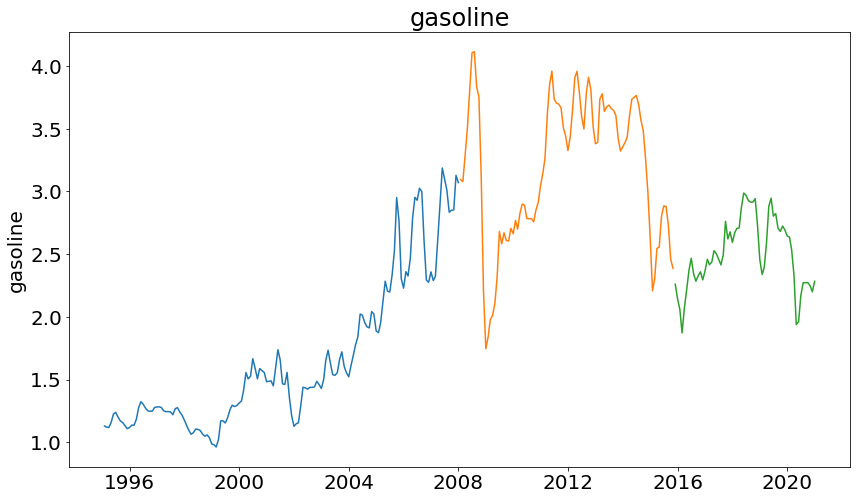

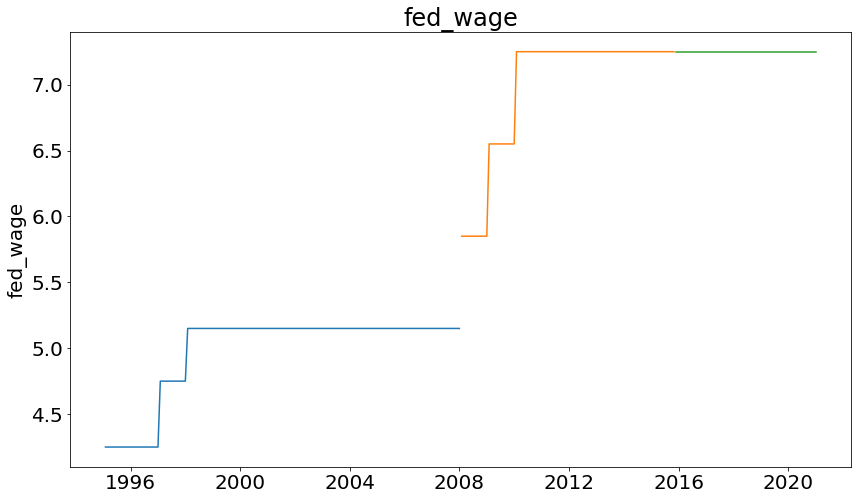

In [91]:
for col in train.columns:
    plt.figure(figsize=(14,8))
    plt.plot(train[col])
    plt.plot(validate[col])
    plt.plot(test[col])
    plt.ylabel(col)
    plt.title(col)
    plt.show()

In [92]:
def evaluate(target_var):
    '''
    This function will take the actual values of the target_var from validate, 
    and the predicted values stored in yhat_df, 
    and compute the rmse, rounding to 0 decimal places. 
    it will return the rmse. 
    '''
    rmse = round(sqrt(mean_squared_error(validate[target_var], yhat_df[target_var])), 0)
    return rmse

def plot_and_eval(target_var):
    '''
    This function takes in the target var name (string), and returns a plot
    of the values of train for that variable, validate, and the predicted values from yhat_df. 
    it will als lable the rmse. 
    '''
    plt.figure(figsize = (12,4))
    plt.plot(train[target_var])
    plt.plot(validate[target_var])
    plt.plot(test[target_var])
    plt.plot(yhat_df[target_var])
    plt.title(target_var)
    #rmse = evaluate(target_var)
    #print(target_var, '-- RMSE: {:.0f}'.format(rmse))
    plt.show()
    
# create an empty dataframe
eval_df = pd.DataFrame(columns=['model_type', 'target_var', 'rmse'])

# function to store the rmse so that we can compare
def append_eval_df(model_type, target_var):
    '''
    this function takes in as arguments the type of model run, and the name of the target variable. 
    It returns the eval_df with the rmse appended to it for that model and target_var. 
    '''
    rmse = evaluate(target_var)
    d = {'model_type': [model_type], 'target_var': [target_var],
        'rmse': [rmse]}
    d = pd.DataFrame(d)
    return eval_df.append(d, ignore_index = True)

### Forecast
Forecasting is another word for predicting time series data.

- Last Observed Value: The future will look like the now
- Simple Average: The future will look, on average, like history.
- Moving Average: The future will look, on average, like recent history.
- Holt's Linear Trend
- Previous Cycle
### Last observed value
The simplest method for forecasting is to predict all future values to be the last observed value.

### Make Predictions

### Gasoline prices

In [93]:
validate.head()

,gasoline,fed_wage
Date,,
2008-01-31,3.09450,5.85
2008-02-29,3.07825,5.85
2008-03-31,3.29320,5.85
2008-04-30,3.50725,5.85
2008-05-31,3.81500,5.85


In [94]:
# take the last item of sales total and assign to variable
last_gas_price = train['gasoline'][-1:][0]
last_gas_price

3.0704000000000002

### Federal minimum wage

In [95]:
# take the last item of quantity and assign to variable
last_fed_wage = round(train['gasoline'][-1:][0],2)
last_fed_wage

3.07

In [96]:
yhat_df = pd.DataFrame(
    {'gasoline': [last_gas_price],
     'fed_wage': [last_fed_wage]},
    index=validate.index)

yhat_df.head()

,gasoline,fed_wage
Date,,
2008-01-31,3.0704,3.07
2008-02-29,3.0704,3.07
2008-03-31,3.0704,3.07
2008-04-30,3.0704,3.07
2008-05-31,3.0704,3.07


In [97]:
#describing the data
yhat_df.describe()

,gasoline,fed_wage
count,9.400000e+01,9.400000e+01
mean,3.070400e+00,3.070000e+00
std,4.464704e-15,4.911174e-15
min,3.070400e+00,3.070000e+00
25%,3.070400e+00,3.070000e+00
50%,3.070400e+00,3.070000e+00
75%,3.070400e+00,3.070000e+00
max,3.070400e+00,3.070000e+00


## Simple Average
Take the simple average of historical values and use that value to predict future values.

This is a good option for an initial baseline. Every future datapoint (those in 'test') will be assigned the same value, and that value will be the overall mean of the values in train.

Make Predictions

Gasoline(prices): establishing the value of the prediction we will make

In [98]:
# compute simple average
avg_gas = round(train['gasoline'].mean(), 2)
avg_gas

1.66

In [99]:
avg_fed_wage = round(train['fed_wage'].mean(), 2)
avg_fed_wage

4.98

In [100]:
def make_predictions(gas=None, wage=None):
    yhat_df = pd.DataFrame({'gasoline': [gas],
                           'fed_wage': [wage]},
                          index=validate.index)
    return yhat_df

In [101]:
yhat_df = make_predictions(avg_gas, avg_fed_wage)
yhat_df.head()

,gasoline,fed_wage
Date,,
2008-01-31,1.66,4.98
2008-02-29,1.66,4.98
2008-03-31,1.66,4.98
2008-04-30,1.66,4.98
2008-05-31,1.66,4.98


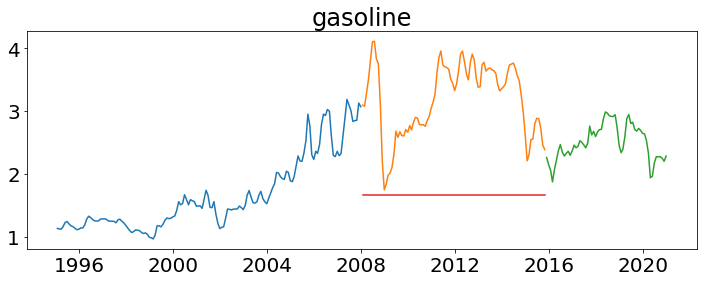

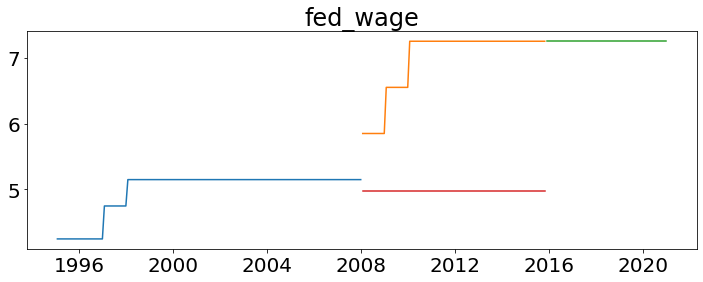

In [102]:
for col in train.columns:
    plot_and_eval(col)

***


### Moving Average
In this example, we will use a 30-day moving average to forecast. In other words, the average over the last 30-days will be used as the forecasted value.

In [103]:
# demonstrate that the mean of the month 
# rolling monthly prices
print(train['gasoline'].rolling(1).mean())

Date
1995-01-31    1.13000
1995-02-28    1.12025
1995-03-31    1.11850
1995-04-30    1.15725
1995-05-31    1.22520
1995-06-30    1.23850
1995-07-31    1.20080
1995-08-31    1.17000
1995-09-30    1.15775
1995-10-31    1.13360
1995-11-30    1.10850
1995-12-31    1.11750
1996-01-31    1.13680
1996-02-29    1.13550
1996-03-31    1.18300
1996-04-30    1.27540
1996-05-31    1.32375
1996-06-30    1.30325
1996-07-31    1.27260
1996-08-31    1.25075
1996-09-30    1.24700
1996-10-31    1.24900
1996-11-30    1.27775
1996-12-31    1.28180
1997-01-31    1.28250
1997-02-28    1.27625
1997-03-31    1.25120
1997-04-30    1.24425
1997-05-31    1.24450
1997-06-30    1.24180
1997-07-31    1.21975
1997-08-31    1.26775
1997-09-30    1.27600
1997-10-31    1.24200
1997-11-30    1.21575
1997-12-31    1.17700
1998-01-31    1.13225
1998-02-28    1.09600
1998-03-31    1.06380
1998-04-30    1.07675
1998-05-31    1.10525
1998-06-30    1.10260
1998-07-31    1.09350
1998-08-31    1.06500
1998-09-30    1.04850
1998-

In [104]:
period=30
train['gasoline'].rolling(period).mean()[-1]

2.6878916666666663

In [105]:
period = 30

# take monthly rolling average, then take the last element and that will the one that propogates 
# forward as our prediction. 
rolling_gas = round(train['gasoline'].rolling(period).mean()[-1], 2)
rolling_fed_wage = round(train['fed_wage'].rolling(period).mean()[-1], 2)
print(rolling_gas, rolling_fed_wage)

2.69 5.15


In [106]:
yhat_df = make_predictions(rolling_gas, rolling_fed_wage)
yhat_df.head()

,gasoline,fed_wage
Date,,
2008-01-31,2.69,5.15
2008-02-29,2.69,5.15
2008-03-31,2.69,5.15
2008-04-30,2.69,5.15
2008-05-31,2.69,5.15


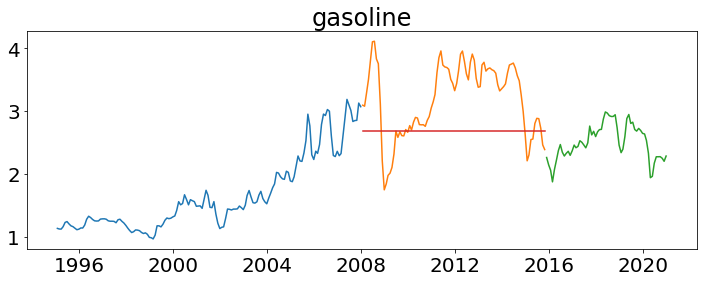

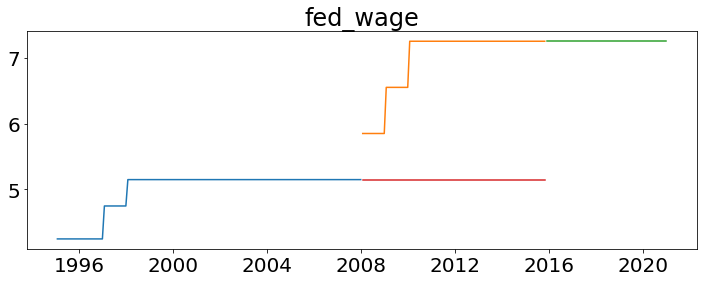

In [107]:
for col in train.columns:
    plot_and_eval(col)


***

## Seasonal Decomposition

fed_wage 



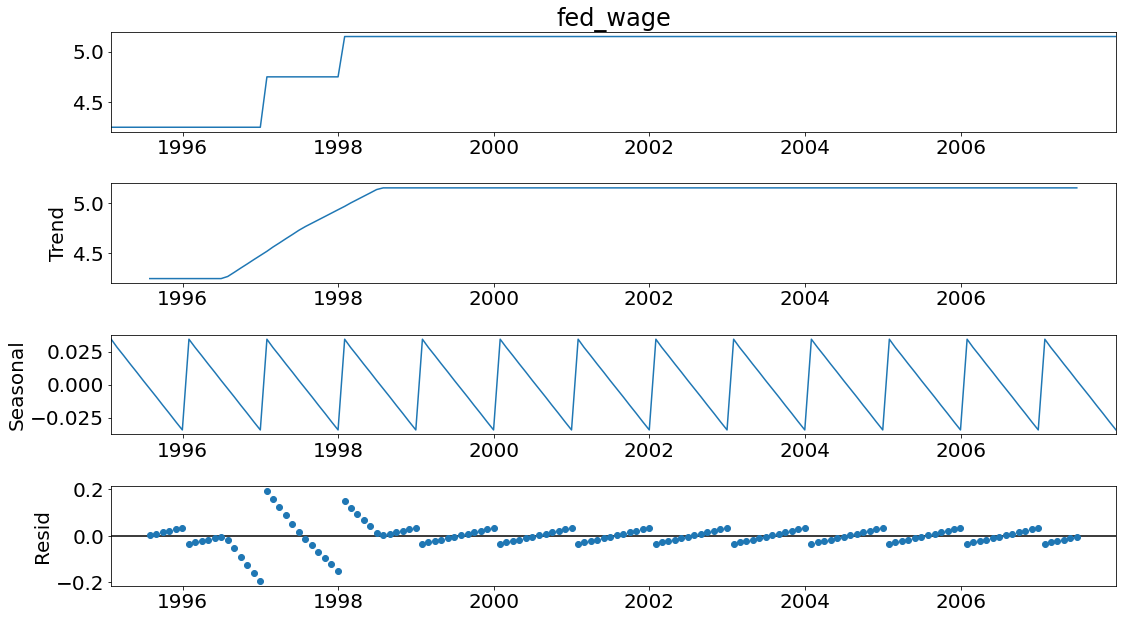

In [108]:
import statsmodels.api as sm
#graphing trends for federal wage
print(col, '\n')
sm.tsa.seasonal_decompose(train[col].resample('M').mean()).plot()
plt.show()

gasoline 

fed_wage 



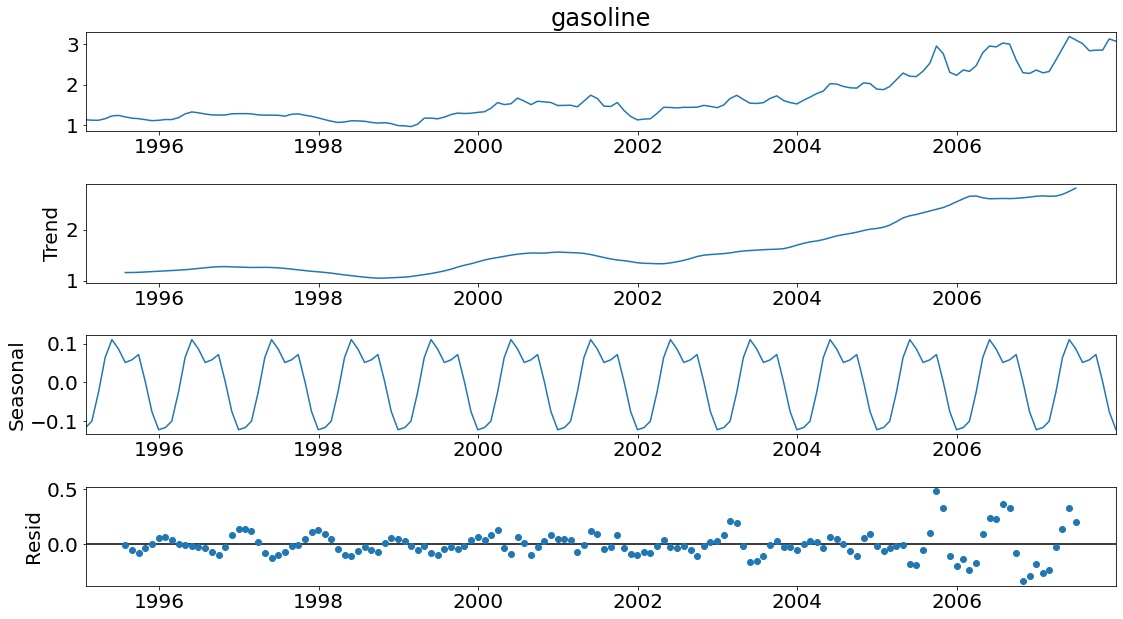

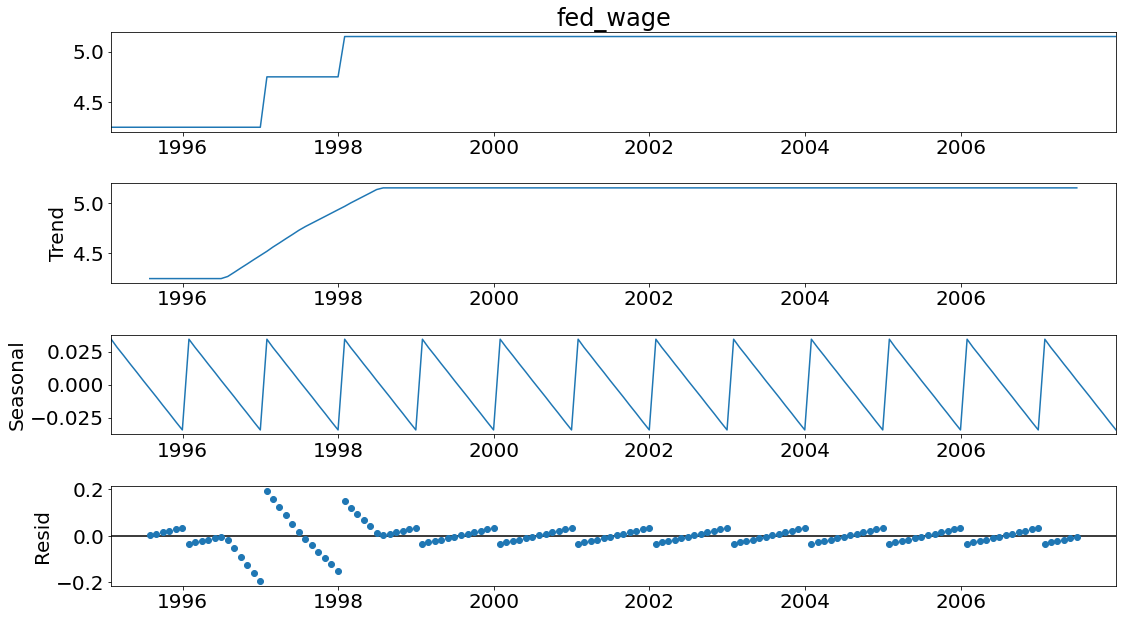

In [109]:
#graphing trends for gasolone
for col in train.columns:
    print(col,'\n')
    sm.tsa.seasonal_decompose(train[col].resample('m').mean()).plot()

***

## Basic Holt's Linear Trend

In [110]:
col = 'gasoline' 
# create our Holt's Object
model = Holt(train[col], exponential=False, damped=True)

/var/folders/dc/8rtfvpyj2mb6mqbnfkf5dl400000gn/T/ipykernel_28795/3989267543.py:3: FutureWarning: the 'damped'' keyword is deprecated, use 'damped_trend' instead
  model = Holt(train[col], exponential=False, damped=True)
/usr/local/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/holtwinters/model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(


In [111]:
# fit the holt's object
model = model.fit(optimized=True)

In [112]:
# Create the empty dataframe
eval_df = pd.DataFrame(columns=['model_type', 'target_var', 'rmse'])


In [113]:
# create a dataframe with the average rise in gas prices
# from the train dataset (2017-2021)

gas = round(train['gasoline'].mean(),2)
fed = round(train['fed_wage'].mean(),2)

yhat_df = pd.DataFrame({'gasoline':[gas],
                        'fed_wage':[fed]}, index=test.index)

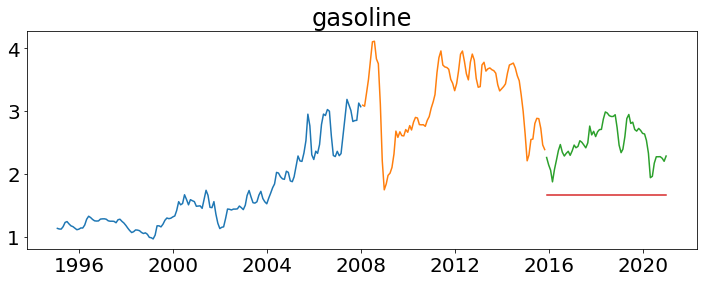

In [114]:
# Plot actual vs predicted
plot_and_eval(col)

In [115]:
yhat_df

,gasoline,fed_wage
Date,,
2015-11-30,1.66,4.98
2015-12-31,1.66,4.98
2016-01-31,1.66,4.98
2016-02-29,1.66,4.98
2016-03-31,1.66,4.98
2016-04-30,1.66,4.98
2016-05-31,1.66,4.98
2016-06-30,1.66,4.98
2016-07-31,1.66,4.98


## Predict Based on Previous Cycle

In [116]:
 df

,gasoline,fed_wage
Date,,
1995-01-02,1.127,4.25
1995-01-09,1.134,4.25
1995-01-16,1.126,4.25
1995-01-23,1.132,4.25
1995-01-30,1.131,4.25
...,...,...
2020-11-30,2.211,7.25
2020-12-07,2.246,7.25
2020-12-14,2.247,7.25


In [127]:
#resplitting data
train = df[:'2003']
validate = df['2004':'2012']
test = df['2013':]


/var/folders/dc/8rtfvpyj2mb6mqbnfkf5dl400000gn/T/ipykernel_28795/290493225.py:3: FutureWarning: Value based partial slicing on non-monotonic DatetimeIndexes with non-existing keys is deprecated and will raise a KeyError in a future Version.
  validate = df['2004':'2012']
/var/folders/dc/8rtfvpyj2mb6mqbnfkf5dl400000gn/T/ipykernel_28795/290493225.py:4: FutureWarning: Value based partial slicing on non-monotonic DatetimeIndexes with non-existing keys is deprecated and will raise a KeyError in a future Version.
  test = df['2013':]


In [128]:
train

,gasoline,fed_wage
Date,,
1995-01-02,1.127,4.25
1995-01-09,1.134,4.25
1995-01-16,1.126,4.25
1995-01-23,1.132,4.25
1995-01-30,1.131,4.25
...,...,...
2003-12-01,1.533,5.15
2003-12-08,1.519,5.15
2003-12-15,1.509,5.15


In [129]:
validate

,gasoline,fed_wage
Date,,
2004-01-05,1.552,5.15
2004-01-12,1.603,5.15
2004-01-19,1.637,5.15
2004-01-26,1.664,5.15
2004-02-02,1.660,5.15
...,...,...
2012-12-03,3.463,7.25
2012-12-10,3.419,7.25
2012-12-17,3.324,7.25


In [130]:
test

,gasoline,fed_wage
Date,,
2013-01-07,3.373,7.25
2013-01-14,3.377,7.25
2013-01-21,3.386,7.25
2013-01-28,3.427,7.25
2013-02-04,3.604,7.25
...,...,...
2020-11-30,2.211,7.25
2020-12-07,2.246,7.25
2020-12-14,2.247,7.25


In [131]:
#making predictions
yhat_df = train[:'2007'] + train.diff(365).mean()

In [132]:
pd.concat([yhat_df.head(1), validate.head(1)])

,gasoline,fed_wage
Date,,
1995-01-02,1.133496,4.263132
2004-01-05,1.552000,5.150000


In [133]:
validate.shape

(25380, 2)

In [134]:
yhat_df.shape

(25380, 2)

In [135]:
# set yhat_df to index of validate
yhat_df.index = train.index

len(yhat_df)

25380

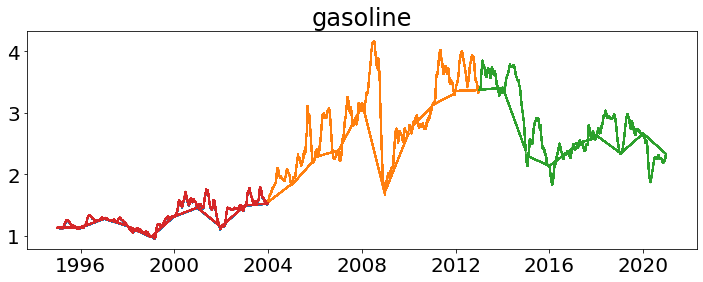

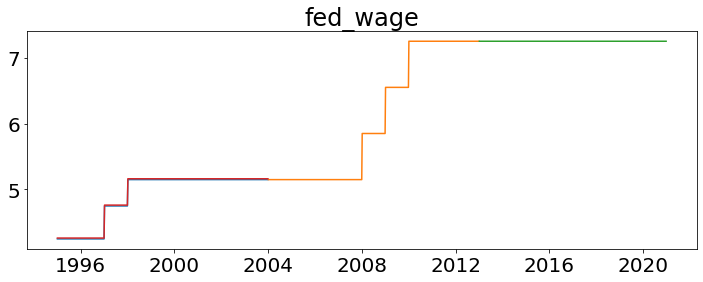

In [136]:
#Plot and Evaluate
for col in train.columns:
    plot_and_eval(target_var = col)
    eval_df = append_eval_df(model_type = 'previous years', target_var = col)


In [137]:
eval_df

,model_type,target_var,rmse
0,previous years,gasoline,2.0
1,previous years,fed_wage,1.0


In [138]:
# get the min rmse for each variable

min_rmse_gasoline = eval_df.groupby('gasoline')['rmse'].min()[0]
min_rmse_fed_wage = eval_df.groupby('gasoline')['rmse'].min()[1]

# filter only the rows that match those rmse to find out 
# which models are best thus far
eval_df[((eval_df.rmse == min_rmse_gasoline) | 
         (eval_df.rmse == min_rmse_fed_wage)
        )]


KeyError: 'gasoline'

In [142]:
yhat_df = validate[:22518] + train.diff(365).mean()
yhat_df.index = test.index


In [144]:
rmse_gasoline = round(sqrt(mean_squared_error(test['gasoline'], yhat_df['gasoline'])), 0)
rmse_fed_wage = round(sqrt(mean_squared_error(test['fed_wage'], yhat_df['fed_wage'])), 0)


In [145]:
# Plot and evaluate train, validate, and test
def plot_and_eval_test(target_var):
    plt.figure(figsize = (12,4))
    plt.plot(train[target_var], label = 'Train', linewidth = 1)
    plt.plot(validate[target_var], label = 'Validate', linewidth = 1)
    plt.plot(test[target_var], label = 'Test', linewidth = 1)
    plt.plot(yhat_df[target_var], alpha = .5, color="red")
    plt.title(target_var)
    plt.legend()
    plt.show()


rmse - gasoline:  1.0
rmse - fed_wage:  2.0


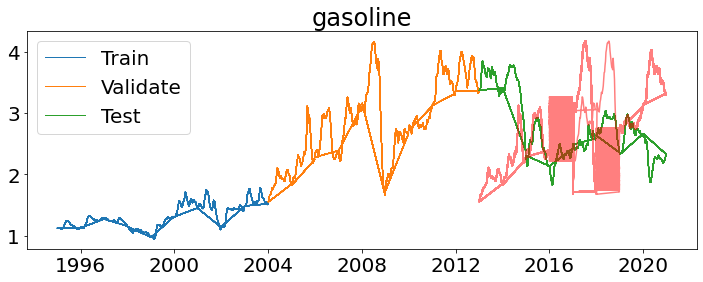

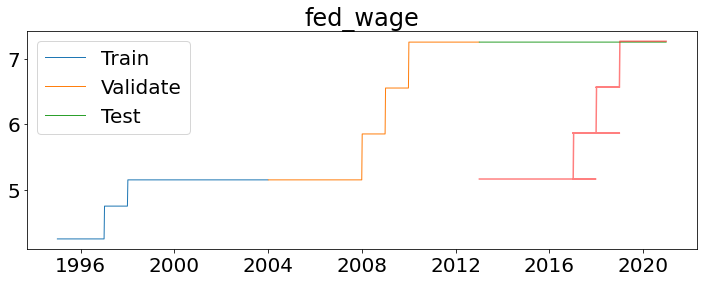

In [146]:
print("rmse - gasoline: ", rmse_gasoline)
print("rmse - fed_wage: ", rmse_fed_wage)

for col in train.columns:
    plot_and_eval_test(col)
